Import Library

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil
import requests
from zipfile import ZipFile
from io import BytesIO
import dlib
import numpy as np
from imutils import face_utils
from bs4 import BeautifulSoup
import pandas
import pathlib
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans
import cv2
from sklearn.model_selection import KFold
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Preprocessing Data

tipe wajah

In [ ]:
# URL dari repositori GitHub yang berisi dataset
github_url = 'https://github.com/baguskencana/dataset/raw/main/tipe_wajah.zip'

# Folder sementara untuk menyimpan dataset yang diunduh
temp_folder = '/content/temp_dataset_wajah'

# Unduh dataset dari GitHub
response = requests.get(github_url)
if response.status_code == 200:
    with ZipFile(BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(temp_folder)
else:
    print("Failed to download the dataset. Status code:", response.status_code)

# Fungsi untuk mengumpulkan semua path gambar berdasarkan kelas
def collect_image_paths(base_folder):
    image_paths = {}
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                class_name = os.path.basename(root)
                if class_name not in image_paths:
                    image_paths[class_name] = []
                image_paths[class_name].append(os.path.join(root, file))
    return image_paths

In [ ]:
import os

# Tentukan path ke direktori tempat dataset diunduh
source_path = '/content/temp_dataset_wajah/tipe_wajah'

# Gabungkan path untuk masing-masing kelas tipe rambut
source_path_ovale = os.path.join(source_path, 'ovale')
source_path_rectangular = os.path.join(source_path, 'rectangular')
source_path_square = os.path.join(source_path, 'square')
source_path_round = os.path.join(source_path, 'round')

# Hapus semua file yang tidak memiliki ekstensi .jpg atau .png
!find {source_path} -type f ! -name "*.jpg" ! -name "*.png" -exec rm {} +

# Hitung jumlah gambar di setiap kelas tipe rambut
num_images_ovale = len(os.listdir(source_path_ovale))
num_images_straight = len(os.listdir(source_path_rectangular))
num_images_wavy = len(os.listdir(source_path_square))
num_images_wavy = len(os.listdir(source_path_round))

# Tampilkan jumlah gambar di setiap kelas
print(f"There are {num_images_ovale} images of ovale.")
print(f"There are {num_images_straight} images of rectangular.")
print(f"There are {num_images_wavy} images of square.")
print(f"There are {num_images_wavy} images of round.")

find: ‘{source_path}’: No such file or directory
There are 345 images of ovale.
There are 207 images of rectangular.
There are 334 images of square.
There are 334 images of round.


tipe rambut

In [ ]:
# URL dari repositori GitHub yang berisi dataset
github_url = 'https://github.com/zahraanadhfh/dataset-capstone/raw/main/tipe_rambut.zip'

# Folder sementara untuk menyimpan dataset yang diunduh
temp_folder = '/content/temp_dataset_rambut'

# Unduh dataset dari GitHub
response = requests.get(github_url)
if response.status_code == 200:
    with ZipFile(BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(temp_folder)
else:
    print("Failed to download the dataset. Status code:", response.status_code)

# Fungsi untuk mengumpulkan semua path gambar berdasarkan kelas
def collect_image_paths(base_folder):
    image_paths = {}
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                class_name = os.path.basename(root)
                if class_name not in image_paths:
                    image_paths[class_name] = []
                image_paths[class_name].append(os.path.join(root, file))
    return image_paths

In [ ]:
import os

# Tentukan path ke direktori tempat dataset diunduh
source_path = '/content/temp_dataset_rambut/tipe_rambut'

# Gabungkan path untuk masing-masing kelas tipe rambut
source_path_curly = os.path.join(source_path, 'curly hair')
source_path_straight = os.path.join(source_path, 'straight hair')
source_path_wavy = os.path.join(source_path, 'wavy hair')
source_path_bald = os.path.join(source_path, 'bald hair')

# Hapus semua file yang tidak memiliki ekstensi .jpg atau .png
!find {source_path} -type f ! -name "*.jpg" ! -name "*.png" -exec rm {} +

# Hitung jumlah gambar di setiap kelas tipe rambut
num_images_curly = len(os.listdir(source_path_curly))
num_images_straight = len(os.listdir(source_path_straight))
num_images_wavy = len(os.listdir(source_path_wavy))
num_images_bald = len(os.listdir(source_path_bald))

# Tampilkan jumlah gambar di setiap kelas
print(f"There are {num_images_curly} images of curly.")
print(f"There are {num_images_straight} images of straight.")
print(f"There are {num_images_wavy} images of wavy.")
print(f"There are {num_images_bald} images of bald.")


find: ‘{source_path}’: No such file or directory
There are 143 images of curly.
There are 168 images of straight.
There are 224 images of wavy.
There are 20 images of bald.


normalisasi dataset tipe rambut

In [ ]:
import os
import shutil

# Tentukan path ke direktori tempat dataset diunduh
source_path = '/content/temp_dataset_rambut/tipe_rambut'

# Fungsi untuk memastikan bahwa setiap file gambar memiliki ekstensi yang diinginkan (.jpg atau .png)
def normalize_folder(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.jpg', '.png')):
            continue
        old_file_path = os.path.join(folder_path, file_name)
        new_file_name = f"{file_name}.jpg"  # Ubah ekstensi menjadi .jpg
        new_file_path = os.path.join(folder_path, new_file_name)
        os.rename(old_file_path, new_file_path)

# Normalisasi setiap kelas tipe rambut
normalize_folder(os.path.join(source_path, 'curly hair'))
normalize_folder(os.path.join(source_path, 'straight hair'))
normalize_folder(os.path.join(source_path, 'wavy hair'))
normalize_folder(os.path.join(source_path, 'bald hair'))

# Tampilkan pesan setelah normalisasi selesai
print("Folder has been normalized successfully.")


Folder has been normalized successfully.


In [ ]:
import os
import cv2

# Tentukan path ke direktori tempat dataset diunduh
source_path = '/content/temp_dataset_rambut/tipe_rambut'

# Fungsi untuk mendapatkan nilai normalisasi setiap pixel dalam gambar
def get_normalized_pixel_values(folder_path):
    pixel_values = []
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        normalized_image = image / 255.0
        pixel_values.append(normalized_image)
    return pixel_values

# Dapatkan nilai normalisasi setiap pixel dalam gambar untuk setiap kelas tipe rambut
curly_pixel_values = get_normalized_pixel_values(os.path.join(source_path, 'curly hair'))
straight_pixel_values = get_normalized_pixel_values(os.path.join(source_path, 'straight hair'))
wavy_pixel_values = get_normalized_pixel_values(os.path.join(source_path, 'wavy hair'))
bald_pixel_values = get_normalized_pixel_values(os.path.join(source_path, 'bald hair'))

# Tampilkan nilai normalisasi setiap pixel dalam gambar untuk setiap kelas tipe rambut
print("Normalized pixel values in Curly Hair class:")
print(curly_pixel_values)

print("\nNormalized pixel values in Straight Hair class:")
print(straight_pixel_values)

print("\nNormalized pixel values in Wavy Hair class:")
print(wavy_pixel_values)

print("\nNormalized pixel values in Bald Hair class:")
print(bald_pixel_values)

Output streaming akan dipotong hingga 5000 baris terakhir.
        [0.39215686, 0.43137255, 0.36862745],
        ...,
        [0.41176471, 0.48627451, 0.51372549],
        [0.40784314, 0.48235294, 0.50980392],
        [0.40784314, 0.48235294, 0.50980392]]]), array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        

Pembagian data

train-test-split

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Tentukan path folder dataset input
input_folder = '/content/temp_dataset_wajah/tipe_wajah'

# Tentukan path folder output untuk menyimpan data train, validation, dan test
output_folder = '/content/train-validation-test'

# Pastikan folder output sudah ada atau buat jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Fungsi untuk mengumpulkan semua path gambar berdasarkan kelas
def collect_image_paths(base_folder):
    image_paths = {}
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                class_name = os.path.basename(root)
                if class_name not in image_paths:
                    image_paths[class_name] = []
                image_paths[class_name].append(os.path.join(root, file))
    return image_paths

# Kumpulkan semua path gambar berdasarkan kelas
image_paths = collect_image_paths(input_folder)

# Buat folder output untuk train, validation, dan test jika belum ada
for split in ['train', 'validation', 'test']:
    split_folder = os.path.join(output_folder, split)
    if not os.path.exists(split_folder):
        os.makedirs(split_folder)

    # Buat folder untuk setiap kelas di dalam folder train, validation, dan test
    for class_name in image_paths.keys():
        class_folder = os.path.join(split_folder, class_name)
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

# Bagi dataset menjadi train (60%), validation (20%), dan test (20%) untuk setiap kelas
for class_name, paths in image_paths.items():
    paths_train, paths_temp = train_test_split(paths, test_size=0.4, random_state=42) # 60% train, 40% temp
    paths_val, paths_test = train_test_split(paths_temp, test_size=0.5, random_state=42) # 20% validation, 20% test

    # Salin gambar ke folder train
    for path in paths_train:
        shutil.copy(path, os.path.join(output_folder, 'train', class_name, os.path.basename(path)))

    # Salin gambar ke folder validation
    for path in paths_val:
        shutil.copy(path, os.path.join(output_folder, 'validation', class_name, os.path.basename(path)))

    # Salin gambar ke folder test
    for path in paths_test:
        shutil.copy(path, os.path.join(output_folder, 'test', class_name, os.path.basename(path)))

print("Pemisahan data train (60%), validation (20%), dan test (20%) untuk setiap kelas selesai.")

Pemisahan data train (60%), validation (20%), dan test (20%) untuk setiap kelas selesai.


Face Augmentation

data train

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Tentukan path folder dataset input
input_folder = '/content/train-validation-test/train'

# Tentukan path folder output untuk hasil augmentasi
output_folder = '/content/train-aug'

# Pastikan folder output sudah ada atau buat jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Inisialisasi objek ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=20,            # Rotasi gambar dalam rentang 20 derajat
    width_shift_range=0.1,        # Pergeseran horizontal maksimum sebesar 10% dari lebar gambar
    height_shift_range=0.1,       # Pergeseran vertikal maksimum sebesar 10% dari tinggi gambar
    shear_range=0.1,              # Shear transformation dengan maksimal 10% dari lebar gambar
    zoom_range=0.1,               # Perbesaran gambar dengan kisaran 10%
    horizontal_flip=True,         # Flip gambar secara horizontal
    brightness_range=[0.8, 1.2],  # Rentang kecerahan gambar antara 0.8 dan 1.2
    fill_mode='nearest'           # Metode pengisian untuk transformasi geometris
)

total_augmented_images = 0  # Inisialisasi jumlah total gambar augmented

# Loop melalui setiap subfolder dalam folder input (representing classes)
for class_name in os.listdir(input_folder):
    class_folder = os.path.join(input_folder, class_name)

    # Periksa apakah path saat ini adalah folder
    if os.path.isdir(class_folder):
        # Buat folder output untuk setiap kelas jika belum ada
        class_output_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        # Inisialisasi jumlah gambar augmented untuk kelas saat ini
        class_augmented_images = 0

        # Loop melalui setiap gambar dalam folder kelas
        for filename in os.listdir(class_folder):
            # Dapatkan path lengkap file gambar
            file_path = os.path.join(class_folder, filename)

            # Periksa apakah file adalah file gambar (contoh: .jpg, .jpeg, .png)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Baca gambar dan ubah menjadi array
                img = load_img(file_path)
                img_array = img_to_array(img)

                # Reshape array untuk memenuhi bentuk (1, height, width, channels)
                img_array = img_array.reshape((1,) + img_array.shape)

                # Generate augmented images
                i = 0
                for batch in datagen.flow(img_array, batch_size=1):
                    # Simpan gambar yang dihasilkan dengan nama file yang unik
                    save_path = os.path.join(class_output_folder, f"{os.path.splitext(filename)[0]}_aug_{i}.jpg")
                    augmented_image = batch[0].astype('uint8')

                    # Konversi dari RGB (default Keras) ke BGR (default OpenCV) sebelum menyimpan
                    augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)

                    cv2.imwrite(save_path, augmented_image_bgr)
                    i += 1
                    class_augmented_images += 1
                    if i >= 9:  # Tentukan jumlah gambar augmented yang diinginkan
                        break  # Hentikan loop setelah mencapai jumlah yang diinginkan

        # Tambahkan jumlah gambar augmented untuk kelas saat ini ke total_augmented_images
        total_augmented_images += class_augmented_images
        print(f"Jumlah gambar augmented untuk kelas {class_name}: {class_augmented_images}")

print("Augmentasi selesai.")
print(f"Total gambar augmented: {total_augmented_images}")

Jumlah gambar augmented untuk kelas rectangular: 1116
Jumlah gambar augmented untuk kelas ovale: 1863
Jumlah gambar augmented untuk kelas square: 1719
Jumlah gambar augmented untuk kelas round: 1791
Augmentasi selesai.
Total gambar augmented: 6489


Face Detection using Haarcascade clasifier

data train

In [ ]:
import cv2
import os

def detect_faces_and_save(input_folder, output_folder):
    # Memuat model Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Loop melalui setiap subfolder dalam folder input
    for subfolder_name in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder_name)

        # Periksa apakah subfolder adalah folder
        if os.path.isdir(subfolder_path):
            # Buat folder output untuk subfolder saat ini jika belum ada
            output_subfolder_path = os.path.join(output_folder, subfolder_name)
            if not os.path.exists(output_subfolder_path):
                os.makedirs(output_subfolder_path)

            # Loop melalui setiap gambar dalam subfolder
            for filename in os.listdir(subfolder_path):
                # Baca gambar dari subfolder
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Failed to read image {image_path}")
                    continue

                # Mengonversi gambar ke skala abu-abu
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Mendeteksi wajah dalam gambar
                faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

                # Gambar persegi panjang di sekitar wajah yang terdeteksi
                for (x, y, w, h) in faces:
                    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi
                output_image_path = os.path.join(output_subfolder_path, f"annotated_{filename}")
                cv2.imwrite(output_image_path, image)  # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi

# Tentukan folder input dan output
input_folder = '/content/train-aug'
output_folder = "/content/train_detect"

# Panggil fungsi untuk mendeteksi wajah dalam setiap gambar dan menyimpannya ke dalam folder baru
detect_faces_and_save(input_folder, output_folder)


data val

In [ ]:
import cv2
import os

def detect_faces_and_save(input_folder, output_folder):
    # Memuat model Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Loop melalui setiap subfolder dalam folder input
    for subfolder_name in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder_name)

        # Periksa apakah subfolder adalah folder
        if os.path.isdir(subfolder_path):
            # Buat folder output untuk subfolder saat ini jika belum ada
            output_subfolder_path = os.path.join(output_folder, subfolder_name)
            if not os.path.exists(output_subfolder_path):
                os.makedirs(output_subfolder_path)

            # Loop melalui setiap gambar dalam subfolder
            for filename in os.listdir(subfolder_path):
                # Baca gambar dari subfolder
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Failed to read image {image_path}")
                    continue

                # Mengonversi gambar ke skala abu-abu
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Mendeteksi wajah dalam gambar
                faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

                # Gambar persegi panjang di sekitar wajah yang terdeteksi
                for (x, y, w, h) in faces:
                    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi
                output_image_path = os.path.join(output_subfolder_path, f"annotated_{filename}")
                cv2.imwrite(output_image_path, image)  # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi

# Tentukan folder input dan output
input_folder = "/content/train-validation-test/validation"
output_folder = "/content/val_detect"

# Panggil fungsi untuk mendeteksi wajah dalam setiap gambar dan menyimpannya ke dalam folder baru
detect_faces_and_save(input_folder, output_folder)


data test

In [ ]:
import cv2
import os

def detect_faces_and_save(input_folder, output_folder):
    # Memuat model Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Loop melalui setiap subfolder dalam folder input
    for subfolder_name in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, subfolder_name)

        # Periksa apakah subfolder adalah folder
        if os.path.isdir(subfolder_path):
            # Buat folder output untuk subfolder saat ini jika belum ada
            output_subfolder_path = os.path.join(output_folder, subfolder_name)
            if not os.path.exists(output_subfolder_path):
                os.makedirs(output_subfolder_path)

            # Loop melalui setiap gambar dalam subfolder
            for filename in os.listdir(subfolder_path):
                # Baca gambar dari subfolder
                image_path = os.path.join(subfolder_path, filename)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Failed to read image {image_path}")
                    continue

                # Mengonversi gambar ke skala abu-abu
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Mendeteksi wajah dalam gambar
                faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

                # Gambar persegi panjang di sekitar wajah yang terdeteksi
                for (x, y, w, h) in faces:
                    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi
                output_image_path = os.path.join(output_subfolder_path, f"annotated_{filename}")
                cv2.imwrite(output_image_path, image)  # Simpan gambar dengan persegi panjang di sekitar wajah yang terdeteksi

# Tentukan folder input dan output
input_folder = "/content/train-validation-test/test"
output_folder = "/content/test_detect"

# Panggil fungsi untuk mendeteksi wajah dalam setiap gambar dan menyimpannya ke dalam folder baru
detect_faces_and_save(input_folder, output_folder)


Landmark Face Detection

data train

In [ ]:
import os
import cv2
import dlib
import numpy as np
import pandas as pd
from imutils import face_utils

# Tentukan path folder dataset input
input_folder = "/content/train_detect"

# Tentukan path folder output untuk gambar yang sudah dinormalisasi
output_folder = '/content/train_landmark'

# Pastikan folder output sudah ada atau buat jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unduh model prediksi landmark wajah dari dlib jika belum diunduh
if not os.path.exists("shape_predictor_68_face_landmarks.dat"):
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Muat prediktor dlib untuk deteksi landmark wajah
predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Fungsi untuk mendeteksi wajah dan mengekstraksi landmark wajah
def detect_and_extract_landmarks(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_image, 1)
    landmarks = []

    for face in faces:
        shape = predictor(gray_image, face)
        shape = face_utils.shape_to_np(shape)
        landmarks.append(shape)

    return landmarks

# Inisialisasi list untuk menyimpan data landmark
landmark_data = []

# Loop melalui setiap subfolder dalam folder input (representing classes)
for class_name in os.listdir(input_folder):
    class_folder = os.path.join(input_folder, class_name)

    # Periksa apakah path saat ini adalah folder
    if os.path.isdir(class_folder):
        # Buat folder output untuk setiap kelas jika belum ada
        class_output_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        # Loop melalui setiap gambar dalam folder kelas
        for filename in os.listdir(class_folder):
            # Dapatkan path lengkap file gambar
            file_path = os.path.join(class_folder, filename)

            # Periksa apakah file adalah file gambar (contoh: .jpg, .jpeg, .png)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Baca gambar menggunakan OpenCV
                img = cv2.imread(file_path)

                # Konversi ke skala abu-abu
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Deteksi wajah dan ekstraksi landmark wajah
                landmarks = detect_and_extract_landmarks(img)

                # Gambar landmark wajah pada gambar
                for shape in landmarks:
                    for (x, y) in shape:
                        cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

                    # Tambahkan data landmark ke dalam list
                    landmark_data.append([filename, class_name] + shape.flatten().tolist())

                # Normalisasi gambar
                normalized_img = img / 255.0

                # Tentukan path untuk menyimpan gambar yang sudah dinormalisasi
                output_path = os.path.join(class_output_folder, filename)

                # Simpan gambar yang sudah dinormalisasi
                cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))

# Buat DataFrame dari data landmark
columns = ['filename', 'class']
for i in range(1, 69):  # 68 landmarks, each with x and y coordinates
    columns.append(f'x{i}')
    columns.append(f'y{i}')

landmark_df = pd.DataFrame(landmark_data, columns=columns)

# Simpan DataFrame ke file CSV
landmark_df.to_csv(os.path.join(output_folder, 'train_landmark_coordinates.csv'), index=False)

print("Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.")


Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.


data val

In [ ]:
import os
import cv2
import dlib
import numpy as np
import pandas as pd
from imutils import face_utils

# Tentukan path folder dataset input
input_folder = '/content/val_detect'

# Tentukan path folder output untuk gambar yang sudah dinormalisasi
output_folder = '/content/val_landmark'

# Pastikan folder output sudah ada atau buat jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unduh model prediksi landmark wajah dari dlib jika belum diunduh
if not os.path.exists("shape_predictor_68_face_landmarks.dat"):
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Muat prediktor dlib untuk deteksi landmark wajah
predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Fungsi untuk mendeteksi wajah dan mengekstraksi landmark wajah
def detect_and_extract_landmarks(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_image, 1)
    landmarks = []

    for face in faces:
        shape = predictor(gray_image, face)
        shape = face_utils.shape_to_np(shape)
        landmarks.append(shape)

    return landmarks

# Inisialisasi list untuk menyimpan data landmark
landmark_data = []

# Loop melalui setiap subfolder dalam folder input (representing classes)
for class_name in os.listdir(input_folder):
    class_folder = os.path.join(input_folder, class_name)

    # Periksa apakah path saat ini adalah folder
    if os.path.isdir(class_folder):
        # Buat folder output untuk setiap kelas jika belum ada
        class_output_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        # Loop melalui setiap gambar dalam folder kelas
        for filename in os.listdir(class_folder):
            # Dapatkan path lengkap file gambar
            file_path = os.path.join(class_folder, filename)

            # Periksa apakah file adalah file gambar (contoh: .jpg, .jpeg, .png)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Baca gambar menggunakan OpenCV
                img = cv2.imread(file_path)

                # Konversi ke skala abu-abu
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Deteksi wajah dan ekstraksi landmark wajah
                landmarks = detect_and_extract_landmarks(img)

                # Gambar landmark wajah pada gambar
                for shape in landmarks:
                    for (x, y) in shape:
                        cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

                    # Tambahkan data landmark ke dalam list
                    landmark_data.append([filename, class_name] + shape.flatten().tolist())

                # Normalisasi gambar
                normalized_img = img / 255.0

                # Tentukan path untuk menyimpan gambar yang sudah dinormalisasi
                output_path = os.path.join(class_output_folder, filename)

                # Simpan gambar yang sudah dinormalisasi
                cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))

# Buat DataFrame dari data landmark
columns = ['filename', 'class']
for i in range(1, 69):  # 68 landmarks, each with x and y coordinates
    columns.append(f'x{i}')
    columns.append(f'y{i}')

landmark_df = pd.DataFrame(landmark_data, columns=columns)

# Simpan DataFrame ke file CSV
landmark_df.to_csv(os.path.join(output_folder, 'val_landmark_coordinates.csv'), index=False)

print("Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.")


Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.


data test

In [ ]:
import os
import cv2
import dlib
import numpy as np
import pandas as pd
from imutils import face_utils

# Tentukan path folder dataset input
input_folder = '/content/test_detect'

# Tentukan path folder output untuk gambar yang sudah dinormalisasi
output_folder = '/content/test_landmark'

# Pastikan folder output sudah ada atau buat jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unduh model prediksi landmark wajah dari dlib jika belum diunduh
if not os.path.exists("shape_predictor_68_face_landmarks.dat"):
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

# Muat prediktor dlib untuk deteksi landmark wajah
predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Fungsi untuk mendeteksi wajah dan mengekstraksi landmark wajah
def detect_and_extract_landmarks(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_image, 1)
    landmarks = []

    for face in faces:
        shape = predictor(gray_image, face)
        shape = face_utils.shape_to_np(shape)
        landmarks.append(shape)

    return landmarks

# Inisialisasi list untuk menyimpan data landmark
landmark_data = []

# Loop melalui setiap subfolder dalam folder input (representing classes)
for class_name in os.listdir(input_folder):
    class_folder = os.path.join(input_folder, class_name)

    # Periksa apakah path saat ini adalah folder
    if os.path.isdir(class_folder):
        # Buat folder output untuk setiap kelas jika belum ada
        class_output_folder = os.path.join(output_folder, class_name)
        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        # Loop melalui setiap gambar dalam folder kelas
        for filename in os.listdir(class_folder):
            # Dapatkan path lengkap file gambar
            file_path = os.path.join(class_folder, filename)

            # Periksa apakah file adalah file gambar (contoh: .jpg, .jpeg, .png)
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Baca gambar menggunakan OpenCV
                img = cv2.imread(file_path)

                # Konversi ke skala abu-abu
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Deteksi wajah dan ekstraksi landmark wajah
                landmarks = detect_and_extract_landmarks(img)

                # Gambar landmark wajah pada gambar
                for shape in landmarks:
                    for (x, y) in shape:
                        cv2.circle(img, (x, y), 1, (0, 0, 255), -1)

                    # Tambahkan data landmark ke dalam list
                    landmark_data.append([filename, class_name] + shape.flatten().tolist())

                # Normalisasi gambar
                normalized_img = img / 255.0

                # Tentukan path untuk menyimpan gambar yang sudah dinormalisasi
                output_path = os.path.join(class_output_folder, filename)

                # Simpan gambar yang sudah dinormalisasi
                cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))

# Buat DataFrame dari data landmark
columns = ['filename', 'class']
for i in range(1, 69):  # 68 landmarks, each with x and y coordinates
    columns.append(f'x{i}')
    columns.append(f'y{i}')

landmark_df = pd.DataFrame(landmark_data, columns=columns)

# Simpan DataFrame ke file CSV
landmark_df.to_csv(os.path.join(output_folder, 'test_landmark_coordinates.csv'), index=False)

print("Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.")


Deteksi wajah, ekstraksi landmark wajah, normalisasi, dan penyimpanan koordinat ke CSV selesai.


CSV file

data train

In [ ]:
import pandas as pd

# Path ke file CSV yang berisi koordinat landmark
csv_file_path = '/content/train_landmark/train_landmark_coordinates.csv'

# Membaca file CSV menggunakan pandas
landmark_df = pd.read_csv(csv_file_path)

# Contoh untuk membaca dan menampilkan beberapa baris pertama dari DataFrame
print(landmark_df.head())

# Menyimpan koordinat landmark sebagai list
landmark_list = []
for index, row in landmark_df.iterrows():
    filename = row['filename']
    class_name = row['class']
    coordinates = row[2:].values.reshape(-1, 2).astype(float)  # Mendapatkan koordinat dan mereshape menjadi (68, 2)
    landmark_list.append((filename, class_name, coordinates))

# Contoh untuk menampilkan landmark dari gambar pertama
first_landmark = landmark_list[0]
print(f"Filename: {first_landmark[0]}")
print(f"Class: {first_landmark[1]}")
print(f"Coordinates: {first_landmark[2]}")


Exception ignored in: <function _xla_gc_callback at 0x782c32bc8160>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


                              filename        class   x1   y1   x2   y2   x3  \
0           annotated_REC 45_aug_0.jpg  rectangular  324  331  318  366  317   
1               annotated_49_aug_4.jpg  rectangular   87  117   82  136   78   
2              annotated_156_aug_7.jpg  rectangular   60  131   64  143   69   
3  annotated_image ovale 244_aug_0.jpg  rectangular   88   98   88  108   89   
4               annotated_50_aug_4.jpg  rectangular   72  205   81  235   91   

    y3   x4   y4  ...  x64  y64  x65  y65  x66  y66  x67  y67  x68  y68  
0  401  318  436  ...  427  495  457  501  425  494  410  494  397  489  
1  157   74  177  ...  145  208  161  213  143  215  134  214  125  211  
2  154   73  166  ...  122  158  132  157  123  158  118  159  113  160  
3  119   90  129  ...  129  140  140  140  129  145  124  145  119  144  
4  264  102  292  ...  215  290  237  284  217  299  207  303  195  304  

[5 rows x 138 columns]
Filename: annotated_REC 45_aug_0.jpg
Class: rectang

data val

In [ ]:
import pandas as pd

# Path ke file CSV yang berisi koordinat landmark
csv_file_path = '/content/val_landmark/val_landmark_coordinates.csv'

# Membaca file CSV menggunakan pandas
landmark_df = pd.read_csv(csv_file_path)

# Contoh untuk membaca dan menampilkan beberapa baris pertama dari DataFrame
print(landmark_df.head())

# Menyimpan koordinat landmark sebagai list
landmark_list = []
for index, row in landmark_df.iterrows():
    filename = row['filename']
    class_name = row['class']
    coordinates = row[2:].values.reshape(-1, 2).astype(float)  # Mendapatkan koordinat dan mereshape menjadi (68, 2)
    landmark_list.append((filename, class_name, coordinates))

# Contoh untuk menampilkan landmark dari gambar pertama
first_landmark = landmark_list[0]
print(f"Filename: {first_landmark[0]}")
print(f"Class: {first_landmark[1]}")
print(f"Coordinates: {first_landmark[2]}")


                        filename        class   x1   y1   x2   y2   x3   y3  \
0               annotated_84.jpg  rectangular   89  125   88  143   88  161   
1              annotated_115.jpg  rectangular   62  234   72  288   85  339   
2              annotated_202.jpg  rectangular   26   50   27   55   28   60   
3               annotated_42.jpg  rectangular   79  281   78  307   80  335   
4  annotated_image ovale 251.jpg  rectangular  349  124  349  138  351  152   

    x4   y4  ...  x64  y64  x65  y65  x66  y66  x67  y67  x68  y68  
0   89  180  ...  165  201  178  205  164  202  155  203  147  201  
1  101  387  ...  293  406  327  403  294  422  277  428  256  427  
2   29   65  ...   51   64   54   67   51   68   49   68   47   68  
3   83  363  ...  183  381  219  380  185  395  170  397  156  395  
4  352  166  ...  410  170  425  171  410  177  402  177  395  177  

[5 rows x 138 columns]
Filename: annotated_84.jpg
Class: rectangular
Coordinates: [[ 89. 125.]
 [ 88. 143.]
 [

data test

In [ ]:
import pandas as pd

# Path ke file CSV yang berisi koordinat landmark
csv_file_path = '/content/test_landmark/test_landmark_coordinates.csv'

# Membaca file CSV menggunakan pandas
landmark_df = pd.read_csv(csv_file_path)

# Contoh untuk membaca dan menampilkan beberapa baris pertama dari DataFrame
print(landmark_df.head())

# Menyimpan koordinat landmark sebagai list
landmark_list = []
for index, row in landmark_df.iterrows():
    filename = row['filename']
    class_name = row['class']
    coordinates = row[2:].values.reshape(-1, 2).astype(float)  # Mendapatkan koordinat dan mereshape menjadi (68, 2)
    landmark_list.append((filename, class_name, coordinates))

# Contoh untuk menampilkan landmark dari gambar pertama
first_landmark = landmark_list[0]
print(f"Filename: {first_landmark[0]}")
print(f"Class: {first_landmark[1]}")
print(f"Coordinates: {first_landmark[2]}")


                         filename        class   x1   y1   x2   y2   x3   y3  \
0   annotated_image ovale 258.jpg  rectangular   52   87   51   98   52  109   
1             annotated_RFEC2.jpg  rectangular  191  179  193  201  197  223   
2  annotated_image square 176.jpg  rectangular   64   92   65  104   66  117   
3               annotated_154.jpg  rectangular  135  174  137  194  140  215   
4                annotated_35.jpg  rectangular   61   99   61  111   61  124   

    x4   y4  ...  x64  y64  x65  y65  x66  y66  x67  y67  x68  y68  
0   52  120  ...   89  130  100  133   89  136   83  136   78  135  
1  203  244  ...  285  256  306  253  286  268  274  271  261  269  
2   68  130  ...  118  131  132  132  119  139  112  141  106  140  
3  144  236  ...  232  248  249  246  232  247  222  249  213  249  
4   62  136  ...  108  143  119  144  108  147  102  147   97  146  

[5 rows x 138 columns]
Filename: annotated_image ovale 258.jpg
Class: rectangular
Coordinates: [[ 52.  8

Face Shape Detection

Counting length of forehead

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_forehead_length(midpoint, right_endpoint, left_endpoint):
    distance_to_right = np.linalg.norm(midpoint - right_endpoint)
    distance_to_left = np.linalg.norm(midpoint - left_endpoint)
    forehead_length = (distance_to_right + distance_to_left) / 2
    return forehead_length

def process_image(image_path, landmarks_df):
    # Baca filename dari image_path
    filename = os.path.basename(image_path)

    # Cari koordinat landmark di CSV
    row = landmarks_df[landmarks_df['filename'] == filename]
    if row.empty:
        return None

    # Extract coordinates from the row
    coordinates = row.iloc[0, 2:].values.reshape(-1, 2).astype(float)

    # Tentukan indeks untuk titik-titik landmark yang digunakan
    # Sesuaikan indeks sesuai dengan format landmark yang Anda gunakan
    midpoint_index = 27
    right_endpoint_index = 17
    left_endpoint_index = 26

    # Dapatkan koordinat dari indeks yang ditentukan
    midpoint = coordinates[midpoint_index]
    right_endpoint = coordinates[right_endpoint_index]
    left_endpoint = coordinates[left_endpoint_index]

    # Hitung panjang dahi
    forehead_length = calculate_forehead_length(midpoint, right_endpoint, left_endpoint)
    return forehead_length

# Tentukan path folder dataset
dataset_folder = '/content/train_landmark'

# Path ke file CSV yang berisi koordinat landmark
csv_file_path = '/content/train_landmark_coordinates.csv'

# Baca file CSV ke dalam DataFrame
landmarks_df = pd.read_csv(csv_file_path)

# Loop melalui setiap subfolder di dalam folder dataset
for subdir in os.listdir(dataset_folder):
    subfolder_path = os.path.join(dataset_folder, subdir)
    if os.path.isdir(subfolder_path):
        # Loop melalui setiap gambar di dalam subfolder
        for filename in os.listdir(subfolder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(subfolder_path, filename)
                # Proses gambar dan hitung panjang dahi
                forehead_length = process_image(image_path, landmarks_df)
                if forehead_length is not None:
                    print(f"Forehead Length for {filename}: {forehead_length}")
                else:
                    print(f"Landmark data not found for {filename}")


Streaming output truncated to the last 5000 lines.
Forehead Length for annotated_ovale t70_aug_2.jpg: 46.07131501419693
Forehead Length for annotated_image ovale 290_aug_0.jpg: 50.51006671214384
Landmark data not found for annotated_ovale t67_aug_0.jpg
Forehead Length for annotated_ovale 435_aug_6.jpg: 41.98760552550517
Landmark data not found for annotated_ovale t2_aug_8.jpg
Forehead Length for annotated_image ovale 290_aug_1.jpg: 46.409148922326594
Forehead Length for annotated_ovale t83_aug_1.jpg: 41.01821526512222
Forehead Length for annotated_image ovale 220_aug_4.jpg: 31.048417412905234
Forehead Length for annotated_ovale t10_aug_0.jpg: 121.71699343902242
Landmark data not found for annotated_ovale 297_aug_7.jpg
Forehead Length for annotated_ovale t54_aug_7.jpg: 46.09198229553379
Forehead Length for annotated_511_aug_0.jpg: 37.83474819251094
Landmark data not found for annotated_ovale 352_aug_8.jpg
Landmark data not found for annotated_ovale 349_aug_0.jpg
Forehead Length for anno

Drawing lines of forehead with circles & Calculating angle between the landmarks that we calculated by using arcustangens



In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_forehead_length(midpoint, right_endpoint, left_endpoint):
    distance_to_right = np.linalg.norm(midpoint - right_endpoint)
    distance_to_left = np.linalg.norm(midpoint - left_endpoint)
    forehead_length = (distance_to_right + distance_to_left) / 2
    return forehead_length

def calculate_angle(midpoint, right_endpoint, left_endpoint):
    # Hitung vektor dari titik tengah ke titik kanan dan kiri
    vector_right = right_endpoint - midpoint
    vector_left = left_endpoint - midpoint

    # Hitung sudut relatif terhadap sumbu x menggunakan arctan2
    angle_right = np.arctan2(vector_right[1], vector_right[0])
    angle_left = np.arctan2(vector_left[1], vector_left[0])

    # Hitung perbedaan sudut
    angle_radian = angle_right - angle_left

    # Konversi sudut dari radian ke derajat
    angle_degree = np.degrees(angle_radian)

    # Pastikan sudut berada dalam rentang 0 hingga 180 derajat
    if angle_degree < 0:
        angle_degree += 180
    return angle_degree

def draw_lines_and_circles(image_path, midpoint, right_endpoint, left_endpoint):
    img = cv2.imread(image_path)

    # Draw circles on the points
    cv2.circle(img, (int(midpoint[0]), int(midpoint[1])), 5, (0, 255, 0), -1)
    cv2.circle(img, (int(right_endpoint[0]), int(right_endpoint[1])), 5, (0, 255, 0), -1)
    cv2.circle(img, (int(left_endpoint[0]), int(left_endpoint[1])), 5, (0, 255, 0), -1)

    # Draw lines connecting the points
    cv2.line(img, (int(midpoint[0]), int(midpoint[1])), (int(right_endpoint[0]), int(right_endpoint[1])), (255, 0, 0), 2)
    cv2.line(img, (int(midpoint[0]), int(midpoint[1])), (int(left_endpoint[0]), int(left_endpoint[1])), (255, 0, 0), 2)
    cv2.line(img, (int(right_endpoint[0]), int(right_endpoint[1])), (int(left_endpoint[0]), int(left_endpoint[1])), (255, 0, 0), 2)

    return img

def process_image(image_path, landmarks_df):
    filename = os.path.basename(image_path)
    row = landmarks_df[landmarks_df['filename'] == filename]
    if row.empty:
        return None, None, None
    coordinates = row.iloc[0, 2:].values.reshape(-1, 2).astype(float)

    # Tentukan indeks untuk titik-titik landmark yang digunakan (sesuaikan dengan urutan koordinat dalam file CSV)
    midpoint_index = 27  # Titik landmark di tengah dahi
    right_endpoint_index = 17  # Titik landmark di sisi kanan dahi
    left_endpoint_index = 26  # Titik landmark di sisi kiri dahi

    midpoint = coordinates[midpoint_index]
    right_endpoint = coordinates[right_endpoint_index]
    left_endpoint = coordinates[left_endpoint_index]
    forehead_length = calculate_forehead_length(midpoint, right_endpoint, left_endpoint)
    forehead_angle = calculate_angle(midpoint, right_endpoint, left_endpoint)
    return forehead_length, forehead_angle, (midpoint, right_endpoint, left_endpoint)

# Path ke folder dataset dan file CSV
dataset_folder = '/content/train_landmark'
csv_file_path = '/content/train_landmark/train_landmark_coordinates.csv'

landmarks_df = pd.read_csv(csv_file_path)

# Counter untuk gambar yang ditampilkan
display_count = 0
max_display = 5  # Jumlah maksimal gambar yang ingin ditampilkan

for subdir in os.listdir(dataset_folder):
    subfolder_path = os.path.join(dataset_folder, subdir)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(subfolder_path, filename)
                forehead_length, forehead_angle, points = process_image(image_path, landmarks_df)
                if forehead_length is not None:
                    print(f"Forehead Length for {filename}: {forehead_length}")
                    print(f"Forehead Angle for {filename}: {forehead_angle}")
                    img_with_lines_and_circles = draw_lines_and_circles(image_path, *points)

                    # Save or display the image with drawn lines and circles
                    output_image_path = os.path.join(subfolder_path, f"annotated_{filename}")
                    cv2.imwrite(output_image_path, img_with_lines_and_circles)

                    # Display the image
                    plt.imshow(cv2.cvtColor(img_with_lines_and_circles, cv2.COLOR_BGR2RGB))
                    plt.axis('off')
                    plt.show()

                    display_count += 1
                    if display_count >= max_display:
                        break
                else:
                    print(f"Landmark data not found for {filename}")
        if display_count >= max_display:
            break

print("Proses selesai.")


Calculating similarity between the landmarks

In [ ]:
def calculate_euclidean_distance(points1, points2):
    distances = np.linalg.norm(points1 - points2, axis=1)
    return np.mean(distances)

def process_all_images_and_calculate_similarity(dataset_folder, landmarks_df):
    all_landmarks = []
    filenames = []

    for subdir in os.listdir(dataset_folder):
        subfolder_path = os.path.join(dataset_folder, subdir)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(subfolder_path, filename)
                    _, _, points = process_image(image_path, landmarks_df)
                    if points is not None:
                        all_landmarks.append(points)
                        filenames.append(filename)

    num_images = len(all_landmarks)
    similarity_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(i, num_images):
            similarity = calculate_euclidean_distance(np.array(all_landmarks[i]), np.array(all_landmarks[j]))
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Matriks simetris

    return similarity_matrix, filenames

# Path ke folder dataset dan file CSV
dataset_folder = '/content/train_landmark'
csv_file_path = '/content/train_landmark/train_landmark_coordinates.csv'

landmarks_df = pd.read_csv(csv_file_path)

# Hitung kesamaan antara semua gambar dalam dataset
similarity_matrix, filenames = process_all_images_and_calculate_similarity(dataset_folder, landmarks_df)

# Tampilkan matriks kesamaan
similarity_df = pd.DataFrame(similarity_matrix, index=filenames, columns=filenames)
print(similarity_df)


Extract Hair Features

In [ ]:
  import os
  import cv2
  import numpy as np
  import pandas as pd
  from skimage.feature import local_binary_pattern
  from sklearn.preprocessing import StandardScaler

  # Definisikan fungsi ekstraksi histogram warna
  def extract_color_histogram(image, bins=(8, 8, 8)):
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
      hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
      cv2.normalize(hist, hist)
      return hist.flatten()

  # Definisikan fungsi ekstraksi LBP
  def extract_lbp_features(image, num_points=24, radius=8):
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      lbp = local_binary_pattern(gray, num_points, radius, method="uniform")
      (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
      hist = hist.astype("float")
      hist /= (hist.sum() + 1e-6)
      return hist

  # Definisikan fungsi untuk mengekstraksi fitur dari gambar
  def extract_features(image_path):
      image = cv2.imread(image_path)
      color_features = extract_color_histogram(image)
      texture_features = extract_lbp_features(image)
      return np.hstack([color_features, texture_features])

  # Fungsi untuk ekstraksi fitur dan penyimpanan ke CSV
  def extract_and_save_features(dataset_path, output_csv):
      # List untuk menyimpan fitur dan label
      features = []
      labels = []

      # Loop melalui subfolder dalam dataset
      for label in os.listdir(dataset_path):
          label_path = os.path.join(dataset_path, label)
          if os.path.isdir(label_path):
              for image_name in os.listdir(label_path):
                  image_path = os.path.join(label_path, image_name)
                  if image_path.endswith('.jpg') or image_path.endswith('.png'):
                      feature = extract_features(image_path)
                      features.append(feature)
                      labels.append(label)

      # Konversi ke numpy array
      features = np.array(features)
      labels = np.array(labels)

      # Standarisasi fitur
      scaler = StandardScaler()
      features = scaler.fit_transform(features)

      # Menggabungkan fitur dan label ke dalam DataFrame
      df = pd.DataFrame(features)
      df['hair_label'] = labels

      # Simpan DataFrame ke CSV
      df.to_csv(output_csv, index=False)
      print(f"Fitur disimpan ke {output_csv}")

  # Path ke dataset
  train_dataset_path = '/content/train-aug'
  val_dataset_path = '/content/train-validation-test/validation'
  test_dataset_path = '/content/train-validation-test/test'

  # Simpan hasil ekstraksi ke dalam file CSV
  extract_and_save_features(train_dataset_path, 'train_features_hair.csv')
  extract_and_save_features(val_dataset_path, 'val_features_hair.csv')
  extract_and_save_features(test_dataset_path, 'test_features_hair.csv')


Fitur disimpan ke train_features_hair.csv
Fitur disimpan ke val_features_hair.csv
Fitur disimpan ke test_features_hair.csv


# CNN Model Face Shape

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

Fungsi untuk memproses gambar dan menghitung fitur
def process_image(image_path, landmarks_df):
filename = os.path.basename(image_path)
row = landmarks_df[landmarks_df['filename'] == filename]
if row.empty:
return None
image = cv2.imread(image_path)
image = cv2.resize(image, (128, 128)) # Ubah ukuran gambar sesuai kebutuhan
return image

Fungsi untuk memuat gambar dari dataset
def load_images(dataset_folder, landmarks_df):
images = []
labels = []
for subdir in os.listdir(dataset_folder):
subfolder_path = os.path.join(dataset_folder, subdir)
if os.path.isdir(subfolder_path):
for filename in os.listdir(subfolder_path):
if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
image_path = os.path.join(subfolder_path, filename)
image = process_image(image_path, landmarks_df)
if image is not None:
images.append(image)
label = subdir # Sesuaikan dengan struktur folder Anda
labels.append(label)
return np.array(images), np.array(labels)

Path ke folder dataset dan file CSV
train_folder = '/content/train_landmark'
val_folder = '/content/val_landmark'
test_folder = '/content/test_landmark'
train_csv = '/content/train_landmark/train_landmark_coordinates.csv'
val_csv = '/content/val_landmark/val_landmark_coordinates.csv'
test_csv = '/content/test_landmark/test_landmark_coordinates.csv'

Baca file CSV ke dalam DataFrame
train_landmarks_df = pd.read_csv(train_csv)
val_landmarks_df = pd.read_csv(val_csv)
test_landmarks_df = pd.read_csv(test_csv)

Memuat gambar dari dataset
X_train_images, y_train = load_images(train_folder, train_landmarks_df)
X_val_images, y_val = load_images(val_folder, val_landmarks_df)
X_test_images, y_test = load_images(test_folder, test_landmarks_df)

Rescale pixel values
X_train_images = X_train_images / 255.0
X_val_images = X_val_images / 255.0
X_test_images = X_test_images / 255.0

Encode labels menjadi one-hot vectors
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_val_encoded = to_categorical(label_encoder.transform(y_val))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

Membangun model CNN untuk gambar
image_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x) # Menambahkan dropout

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x) # Menambahkan dropout

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x) # Menambahkan dropout

x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.4)(x) # Menambahkan dropout

output = Dense(len(label_encoder.classes_), activation='softmax')(x)

Membuat dan mengompilasi model
prediction_model = Model(inputs=image_input, outputs=output)
prediction_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Melihat ringkasan model
prediction_model.summary()

Callbacks
early_stopping_callback = EarlyStopping(
monitor='val_accuracy',
patience=10,
mode='max',
verbose=1,
restore_best_weights=True
)

reduce_lr_callback = ReduceLROnPlateau(
monitor='val_loss',
factor=0.2,
patience=5,
min_lr=1e-6,
verbose=1
)

checkpoint_callback = ModelCheckpoint(
'face_model.h5',
monitor='val_accuracy',
save_best_only=True,
mode='max',
verbose=1
)

Melatih model dengan augmentasi data dan callbacks
history = prediction_model.fit(
X_train_images, y_train_encoded,
validation_data=(X_val_images, y_val_encoded),
epochs=100,
batch_size=32,
callbacks=[early_stopping_callback, reduce_lr_callback, checkpoint_callback]
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1849

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


201/201 [==============================] - 11s 43ms/step - loss: 7.4700 - accuracy: 0.2884 - val_loss: 4.5926 - val_accuracy: 0.2458 - lr: 0.0010
Epoch 2/100
201/201 [==============================] - ETA: 0s - loss: 2.6433 - accuracy: 0.2842
Epoch 2: val_accuracy improved from 0.24583 to 0.29583, saving model to face_model.h5
201/201 [==============================] - 8s 42ms/step - loss: 2.6433 - accuracy: 0.2842 - val_loss: 2.1374 - val_accuracy: 0.2958 - lr: 0.0010
Epoch 3/100
201/201 [==============================] - ETA: 0s - loss: 1.8001 - accuracy: 0.2788
Epoch 3: val_accuracy did not improve from 0.29583
201/201 [==============================] - 8s 39ms/step - loss: 1.8001 - accuracy: 0.2788 - val_loss: 2.3153 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 4/100
201/201 [==============================] - ETA: 0s - loss: 1.6962 - accuracy: 0.2977
Epoch 4: val_accuracy did not improve from 0.29583
201/201 [==============================] - 8s 39ms/step - loss: 1.6962 - accuracy: 0.

evaluate model

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('face_model.h5')

# Evaluasi model pada data validasi atau tes
loss, accuracy = model.evaluate([X_test_images, X_test_features], y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menampilkan laporan klasifikasi
y_pred = model.predict([X_test_images, X_test_features])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Label Encoder

In [ ]:
import os
import pandas as pd
from PIL import Image

# Path to the images directory
image_dir = '/content/temp_dataset_wajah/tipe_wajah'

# Initialize lists to store data
file_paths = []
categories = []

# Loop through each category folder and get the file paths
for category in ['ovale', 'rectangular', 'round', 'square']:
    category_path = os.path.join(image_dir, category)
    for filename in os.listdir(category_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_paths.append(os.path.join(category_path, filename))
            categories.append(category)

# Create a DataFrame
data = pd.DataFrame({
    'file_path': file_paths,
    'category': categories
})

# Convert 'category' column to a categorical type
data['category'] = pd.Categorical(data['category'])

# Display the DataFrame
print(data.head())


                                           file_path category
0  /content/temp_dataset_wajah/tipe_wajah/ovale/o...    ovale
1  /content/temp_dataset_wajah/tipe_wajah/ovale/i...    ovale
2  /content/temp_dataset_wajah/tipe_wajah/ovale/5...    ovale
3  /content/temp_dataset_wajah/tipe_wajah/ovale/o...    ovale
4  /content/temp_dataset_wajah/tipe_wajah/ovale/i...    ovale


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
{'ovale': 0, 'rectangular': 1, 'round': 2, 'square' : 3}

{'ovale': 0, 'rectangular': 1, 'round': 2, 'square': 3}


{'ovale': 0, 'rectangular': 1, 'round': 2, 'square': 3}

In [ ]:
print(le_name_mapping)

{'ovale': 0, 'rectangular': 1, 'round': 2, 'square': 3}


In [ ]:
import json
from sklearn import preprocessing

# Misalkan ini adalah data Anda
data = {'category': ['ovale', 'rectangular', 'round', 'square']}

# Membuat LabelEncoder dan menyesuaikan dengan data kategori
le = preprocessing.LabelEncoder()
le.fit(data['category'])
le_name_mapping = {label: int(value) for label, value in zip(le.classes_, le.transform(le.classes_))}

# Menyimpan mapping ke dalam file JSON
with open('label_face_mapping.json', 'w') as json_file:
    json.dump(le_name_mapping, json_file)

print("Mapping telah disimpan ke label_face_mapping.json")


Mapping telah disimpan ke label_face_mapping.json


In [ ]:
# Membaca dan menampilkan isi file JSON
with open('label_face_mapping.json', 'r') as json_file:
    loaded_mapping = json.load(json_file)

print("Isi dari label_face_mapping.json:", loaded_mapping)

Isi dari label_face_mapping.json: {'ovale': 0, 'rectangular': 1, 'round': 2, 'square': 3}


# Predict Face Shape

In [ ]:
# Langkah 1: Unggah gambar melalui file manager
from google.colab import files
uploaded = files.upload()

# Langkah 2: Memuat dan memproses gambar
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan nama file yang diunggah (misal hanya mengunggah satu file)
file_name = list(uploaded.keys())[0]

# Memuat gambar
img = image.load_img(file_name, target_size=(128, 128))  # Sesuaikan target_size dengan input model Anda

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Memproses gambar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi jika diperlukan

# Langkah 3: Memuat model dan melakukan prediksi
from tensorflow.keras.models import load_model

# Memuat model
model = load_model('/content/face_model.h5')  # Ganti dengan path model Anda

# Melakukan prediksi
predictions = model.predict(img_array)

# Menampilkan hasil prediksi
# Misal, jika output model adalah probabilitas untuk setiap kelas
class_mapping = {0: 'ovale', 1: 'rectangular', 2: 'round', 3: 'square'}
predicted_class = np.argmax(predictions)
predicted_class_name = class_mapping[predicted_class]
print(f'Predicted class: {predicted_class_name}')


# CNN Model Hair Type

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Load extracted features from CSV
train_df = pd.read_csv('/content/train_features_hair.csv')
val_df = pd.read_csv('/content/val_features_hair.csv')
test_df = pd.read_csv('/content/test_features_hair.csv')

# Separate features and labels
X_train_features = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_val_features = val_df.iloc[:, :-1].values
y_val = val_df.iloc[:, -1].values

X_test_features = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Encode labels
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(y_train))
y_val = to_categorical(label_encoder.transform(y_val))
y_test = to_categorical(label_encoder.transform(y_test))

# Normalize features
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_val_features = scaler.transform(X_val_features)
X_test_features = scaler.transform(X_test_features)

# Load image data
def load_images(dataset_path, img_height=128, img_width=128):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                if image_path.endswith('.jpg') or image_path.endswith('.png'):
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (img_height, img_width))
                    images.append(image)
                    labels.append(label)
    return np.array(images, dtype=np.float32), np.array(labels)

train_images, train_labels = load_images('/content/train-aug')
val_images, val_labels = load_images('/content/train-validation-test/validation')
test_images, test_labels = load_images('/content/train-validation-test/test')

# Normalize image data
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Ensure the number of samples match between images and labels
if len(train_images) != len(y_train):
    min_length = min(len(train_images), len(y_train))
    train_images = train_images[:min_length]
    y_train = y_train[:min_length]

if len(val_images) != len(y_val):
    min_length = min(len(val_images), len(y_val))
    val_images = val_images[:min_length]
    y_val = y_val[:min_length]

if len(test_images) != len(y_test):
    min_length = min(len(test_images), len(y_test))
    test_images = test_images[:min_length]
    y_test = y_test[:min_length]

# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit datagen ke data pelatihan
datagen.fit(train_images)

# Define CNN for image input with more Dropout layers and L2 regularization
cnn_input = Input(shape=(128, 128, 3), name='cnn_input')
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), name='conv1')(cnn_input)
dropout1 = Dropout(0.25, name='dropout1')(conv1)
pool1 = MaxPooling2D((2, 2), name='pool1')(dropout1)

conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), name='conv2')(pool1)
dropout2 = Dropout(0.25, name='dropout2')(conv2)
pool2 = MaxPooling2D((2, 2), name='pool2')(dropout2)

conv3 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), name='conv3')(pool2)
dropout3 = Dropout(0.25, name='dropout3')(conv3)
pool3 = MaxPooling2D((2, 2), name='pool3')(dropout3)

flatten = Flatten(name='flatten')(pool3)
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.001), name='dense1')(flatten)
dropout4 = Dropout(0.5, name='dropout4')(dense1)
dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.001), name='dense2')(dropout4)
dropout5 = Dropout(0.5, name='dropout5')(dense2)
output = Dense(y_train.shape[1], activation='softmax', name='output')(dropout5)

# Define the model
model = Model(inputs=cnn_input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('hair_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Train the model with augmented data
history = model.fit(
    datagen.flow(train_images, y_train, batch_size=32),
    validation_data=(val_images, y_val),
    epochs=100,
    callbacks=[checkpoint, early_stopping]
)

# Save the model
model.save('hair_model.h5')

evaluate model

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print(f"Test Accuracy: {test_accuracy}")

confusion matrix

In [ ]:
# Predict labels for test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Label Encoder

In [ ]:
import os
import pandas as pd
from PIL import Image

# Path to the images directory
image_dir = '/content/temp_dataset_rambut/tipe_rambut'

# Initialize lists to store data
file_paths = []
categories = []

# Loop through each category folder and get the file paths
for category in ['wavy hair', 'straight hair', 'curly hair', 'bald hair']:
    category_path = os.path.join(image_dir, category)
    for filename in os.listdir(category_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_paths.append(os.path.join(category_path, filename))
            categories.append(category)

# Create a DataFrame
data = pd.DataFrame({
    'file_path': file_paths,
    'category': categories
})

# Convert 'category' column to a categorical type
data['category'] = pd.Categorical(data['category'])

# Display the DataFrame
print(data.head())


                                           file_path   category
0  /content/temp_dataset_rambut/tipe_rambut/wavy ...  wavy hair
1  /content/temp_dataset_rambut/tipe_rambut/wavy ...  wavy hair
2  /content/temp_dataset_rambut/tipe_rambut/wavy ...  wavy hair
3  /content/temp_dataset_rambut/tipe_rambut/wavy ...  wavy hair
4  /content/temp_dataset_rambut/tipe_rambut/wavy ...  wavy hair


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['category'])
le_name_mapping = {label: int(value) for label, value in zip(le.classes_, le.transform(le.classes_))}
print(le_name_mapping)
{'wavy hair': 0, 'straight hair': 1, 'curly hair': 2, 'bald hair' : 3}

{'curly hair': 0, 'straight hair': 1, 'wavy hair': 2}


{'wavy hair': 0, 'straight hair': 1, 'curly hair': 2, 'bald hair': 3}

In [ ]:
import json
from sklearn import preprocessing

# Misalkan ini adalah data Anda
data = {'category': ['wavy hair', 'straight hair', 'curly hair', 'bald hair']}

# Membuat LabelEncoder dan menyesuaikan dengan data kategori
le = preprocessing.LabelEncoder()
le.fit(data['category'])
le_name_mapping = {label: int(value) for label, value in zip(le.classes_, le.transform(le.classes_))}

# Menyimpan mapping ke dalam file JSON
with open('label_hair_mapping.json', 'w') as json_file:
    json.dump(le_name_mapping, json_file)

print("Mapping telah disimpan ke label_hair_mapping.json")


Mapping telah disimpan ke label_hair_mapping.json


In [ ]:
# Membaca dan menampilkan isi file JSON
with open('label_hair_mapping.json', 'r') as json_file:
    loaded_mapping = json.load(json_file)

print("Isi dari label_hair_mapping.json:", loaded_mapping)

Isi dari label_hair_mapping.json: {'bald hair': 0, 'curly hair': 1, 'straight hair': 2, 'wavy hair': 3}


# Predict Hair Type

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Unggah gambar melalui file manager
uploaded = files.upload()

# Langkah 2: Memuat dan memproses gambar
file_name = list(uploaded.keys())[0]  # Menggunakan nama file yang diunggah (misal hanya mengunggah satu file)
img = image.load_img(file_name, target_size=(128, 128))  # Sesuaikan target_size dengan input model Anda
plt.imshow(img)
plt.axis('off')
plt.show()

# Memproses gambar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi jika diperlukan

# Langkah 3: Memuat model dan melakukan prediksi
from tensorflow.keras.models import load_model

# Memuat model
model = load_model('/content/hair_model.h5')  # Ganti dengan path model Anda

# Melakukan prediksi
predictions = model.predict(img_array)

# Menampilkan hasil prediksi
class_mapping = {0: 'wavy hair', 1: 'straight hair', 2: 'curly hair', 3: 'bald hair'}
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_mapping[predicted_class_index]
print(f'Predicted hair type: {predicted_class_name}')


# Final Model (Multi-Output)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

# Fungsi untuk memproses gambar
def process_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    return img

# Load gambar dan fitur dari dataset untuk model wajah
def load_face_images(dataset_folder):
    images = []
    labels = []
    for subdir in os.listdir(dataset_folder):
        subfolder_path = os.path.join(dataset_folder, subdir)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(subfolder_path, filename)
                    img = process_image(image_path)
                    if img is not None:
                        images.append(img)
                        labels.append(subdir)  # Misalnya label adalah nama folder
    return np.array(images), np.array(labels)

# Definisikan variabel untuk data latih dan validasi
train_folder = '/content/train-aug'
val_folder = '/content/train-validation-test/validation'

X_train_images, y_train_images = load_face_images(train_folder)
X_val_images, y_val_images = load_face_images(val_folder)

# Debug: Cek jumlah sampel
print(f'Number of training samples (images): {X_train_images.shape[0]}')
print(f'Number of validation samples (images): {X_val_images.shape[0]}')

# Preprocessing untuk gambar
X_train_images = X_train_images / 255.0
X_val_images = X_val_images / 255.0

# Encode labels menjadi one-hot vectors
label_encoder = LabelEncoder()
y_train_images_encoded = to_categorical(label_encoder.fit_transform(y_train_images))
y_val_images_encoded = to_categorical(label_encoder.transform(y_val_images))

# Load pre-trained face model
face_model_path = '/content/face_model.h5'
face_model = load_model(face_model_path)

# Ambil output dari model wajah (sebelum softmax)
face_output = face_model.layers[-2].output  # output Dense sebelum softmax

# Buat model untuk prediksi tipe wajah
face_output_final = Dense(4, activation='softmax', name='face_output')(face_output)  # Jumlah kelas adalah 4

# Proses output dari face model untuk prediksi tipe rambut
hair_output = Dense(256, activation='relu', name='hair_dense_1')(face_output)
hair_output = Dropout(0.5, name='hair_dropout_1')(hair_output)
hair_output = Dense(128, activation='relu', name='hair_dense_2')(hair_output)
hair_output = Dropout(0.5, name='hair_dropout_2')(hair_output)
hair_output_final = Dense(4, activation='softmax', name='hair_output')(hair_output)  # Jumlah kelas adalah 4

# Buat model gabungan dengan dua output
combined_model = Model(inputs=face_model.input, outputs=[face_output_final, hair_output_final])

# Compile model
combined_model.compile(optimizer='adam',
                       loss={'face_output': 'categorical_crossentropy', 'hair_output': 'categorical_crossentropy'},
                       metrics={'face_output': 'accuracy', 'hair_output': 'accuracy'})

combined_model.summary()

# Definisikan callbacks
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    'combined_model_5.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Latih model gabungan
history = combined_model.fit(
    X_train_images, {'face_output': y_train_images_encoded, 'hair_output': y_train_images_encoded},
    validation_data=(X_val_images, {'face_output': y_val_images_encoded, 'hair_output': y_val_images_encoded}),
    epochs=100, batch_size=32,
    callbacks=[early_stopping_callback, reduce_lr_callback, checkpoint_callback]
)

combined_model.save('combined_model_5.h5')

Number of training samples (images): 6480
Number of validation samples (images): 241
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 128, 128, 32)         128       ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pool

203/203 [==============================] - 17s 45ms/step - loss: 4.3370 - face_output_loss: 1.4411 - hair_output_loss: 1.4791 - face_output_accuracy: 0.3140 - hair_output_accuracy: 0.2880 - val_loss: 4.1944 - val_face_output_loss: 1.4543 - val_hair_output_loss: 1.3813 - val_face_output_accuracy: 0.3237 - val_hair_output_accuracy: 0.2822 - lr: 0.0010
Epoch 2/100
203/203 [==============================] - ETA: 0s - loss: 3.7591 - face_output_loss: 1.2914 - hair_output_loss: 1.3392 - face_output_accuracy: 0.3907 - hair_output_accuracy: 0.3511

203/203 [==============================] - 8s 40ms/step - loss: 3.7591 - face_output_loss: 1.2914 - hair_output_loss: 1.3392 - face_output_accuracy: 0.3907 - hair_output_accuracy: 0.3511 - val_loss: 4.1484 - val_face_output_loss: 1.6358 - val_hair_output_loss: 1.3276 - val_face_output_accuracy: 0.4025 - val_hair_output_accuracy: 0.3734 - lr: 0.0010
Epoch 3/100
203/203 [==============================] - ETA: 0s - loss: 4.0276 - face_output_loss: 1.2273 - hair_output_loss: 1.2759 - face_output_accuracy: 0.4523 - hair_output_accuracy: 0.4262

203/203 [==============================] - 8s 39ms/step - loss: 4.0276 - face_output_loss: 1.2273 - hair_output_loss: 1.2759 - face_output_accuracy: 0.4523 - hair_output_accuracy: 0.4262 - val_loss: 4.5955 - val_face_output_loss: 1.6842 - val_hair_output_loss: 1.2489 - val_face_output_accuracy: 0.4191 - val_hair_output_accuracy: 0.4440 - lr: 0.0010
Epoch 4/100
203/203 [==============================] - ETA: 0s - loss: 4.1317 - face_output_loss: 1.1455 - hair_output_loss: 1.2056 - face_output_accuracy: 0.5114 - hair_output_accuracy: 0.4809

203/203 [==============================] - 8s 40ms/step - loss: 4.1317 - face_output_loss: 1.1455 - hair_output_loss: 1.2056 - face_output_accuracy: 0.5114 - hair_output_accuracy: 0.4809 - val_loss: 4.4027 - val_face_output_loss: 1.3180 - val_hair_output_loss: 1.2414 - val_face_output_accuracy: 0.4523 - val_hair_output_accuracy: 0.4730 - lr: 0.0010
Epoch 5/100
203/203 [==============================] - ETA: 0s - loss: 4.1324 - face_output_loss: 1.0352 - hair_output_loss: 1.1002 - face_output_accuracy: 0.5681 - hair_output_accuracy: 0.5390

203/203 [==============================] - 8s 40ms/step - loss: 4.1324 - face_output_loss: 1.0352 - hair_output_loss: 1.1002 - face_output_accuracy: 0.5681 - hair_output_accuracy: 0.5390 - val_loss: 5.3976 - val_face_output_loss: 1.6614 - val_hair_output_loss: 1.4598 - val_face_output_accuracy: 0.3983 - val_hair_output_accuracy: 0.4274 - lr: 0.0010
Epoch 6/100
203/203 [==============================] - ETA: 0s - loss: 4.2358 - face_output_loss: 0.9387 - hair_output_loss: 1.0088 - face_output_accuracy: 0.6170 - hair_output_accuracy: 0.5870

203/203 [==============================] - 8s 39ms/step - loss: 4.2358 - face_output_loss: 0.9387 - hair_output_loss: 1.0088 - face_output_accuracy: 0.6170 - hair_output_accuracy: 0.5870 - val_loss: 5.8483 - val_face_output_loss: 1.9572 - val_hair_output_loss: 1.5091 - val_face_output_accuracy: 0.4398 - val_hair_output_accuracy: 0.4730 - lr: 0.0010
Epoch 7/100
202/203 [============================>.] - ETA: 0s - loss: 4.3309 - face_output_loss: 0.8736 - hair_output_loss: 0.9461 - face_output_accuracy: 0.6477 - hair_output_accuracy: 0.6185


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


203/203 [==============================] - 8s 40ms/step - loss: 4.3315 - face_output_loss: 0.8741 - hair_output_loss: 0.9464 - face_output_accuracy: 0.6475 - hair_output_accuracy: 0.6185 - val_loss: 5.5818 - val_face_output_loss: 1.6787 - val_hair_output_loss: 1.4903 - val_face_output_accuracy: 0.4357 - val_hair_output_accuracy: 0.4274 - lr: 0.0010
Epoch 8/100
203/203 [==============================] - ETA: 0s - loss: 3.5058 - face_output_loss: 0.6544 - hair_output_loss: 0.7314 - face_output_accuracy: 0.7529 - hair_output_accuracy: 0.7222

203/203 [==============================] - 8s 40ms/step - loss: 3.5058 - face_output_loss: 0.6544 - hair_output_loss: 0.7314 - face_output_accuracy: 0.7529 - hair_output_accuracy: 0.7222 - val_loss: 4.2850 - val_face_output_loss: 1.2320 - val_hair_output_loss: 1.1870 - val_face_output_accuracy: 0.5726 - val_hair_output_accuracy: 0.5560 - lr: 2.0000e-04
Epoch 9/100
203/203 [==============================] - ETA: 0s - loss: 2.8471 - face_output_loss: 0.5306 - hair_output_loss: 0.6128 - face_output_accuracy: 0.8002 - hair_output_accuracy: 0.7758

203/203 [==============================] - 8s 40ms/step - loss: 2.8471 - face_output_loss: 0.5306 - hair_output_loss: 0.6128 - face_output_accuracy: 0.8002 - hair_output_accuracy: 0.7758 - val_loss: 4.0658 - val_face_output_loss: 1.2448 - val_hair_output_loss: 1.2450 - val_face_output_accuracy: 0.5892 - val_hair_output_accuracy: 0.5685 - lr: 2.0000e-04
Epoch 10/100
203/203 [==============================] - ETA: 0s - loss: 2.4917 - face_output_loss: 0.4570 - hair_output_loss: 0.5266 - face_output_accuracy: 0.8296 - hair_output_accuracy: 0.8082

203/203 [==============================] - 8s 41ms/step - loss: 2.4917 - face_output_loss: 0.4570 - hair_output_loss: 0.5266 - face_output_accuracy: 0.8296 - hair_output_accuracy: 0.8082 - val_loss: 4.5213 - val_face_output_loss: 1.5116 - val_hair_output_loss: 1.5667 - val_face_output_accuracy: 0.5809 - val_hair_output_accuracy: 0.5602 - lr: 2.0000e-04
Epoch 11/100
202/203 [============================>.] - ETA: 0s - loss: 2.2391 - face_output_loss: 0.3881 - hair_output_loss: 0.4524 - face_output_accuracy: 0.8591 - hair_output_accuracy: 0.8329

203/203 [==============================] - 8s 41ms/step - loss: 2.2383 - face_output_loss: 0.3879 - hair_output_loss: 0.4520 - face_output_accuracy: 0.8591 - hair_output_accuracy: 0.8332 - val_loss: 4.3373 - val_face_output_loss: 1.4322 - val_hair_output_loss: 1.5395 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.5768 - lr: 2.0000e-04
Epoch 12/100
203/203 [==============================] - ETA: 0s - loss: 2.0522 - face_output_loss: 0.3281 - hair_output_loss: 0.3852 - face_output_accuracy: 0.8914 - hair_output_accuracy: 0.8674

203/203 [==============================] - 8s 40ms/step - loss: 2.0522 - face_output_loss: 0.3281 - hair_output_loss: 0.3852 - face_output_accuracy: 0.8914 - hair_output_accuracy: 0.8674 - val_loss: 4.7988 - val_face_output_loss: 1.6417 - val_hair_output_loss: 1.8289 - val_face_output_accuracy: 0.5643 - val_hair_output_accuracy: 0.5934 - lr: 2.0000e-04
Epoch 13/100
203/203 [==============================] - ETA: 0s - loss: 1.9519 - face_output_loss: 0.2932 - hair_output_loss: 0.3434 - face_output_accuracy: 0.8978 - hair_output_accuracy: 0.8793

203/203 [==============================] - 8s 40ms/step - loss: 1.9519 - face_output_loss: 0.2932 - hair_output_loss: 0.3434 - face_output_accuracy: 0.8978 - hair_output_accuracy: 0.8793 - val_loss: 5.0679 - val_face_output_loss: 1.7401 - val_hair_output_loss: 2.0152 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5643 - lr: 2.0000e-04
Epoch 14/100
203/203 [==============================] - ETA: 0s - loss: 1.8774 - face_output_loss: 0.2635 - hair_output_loss: 0.3073 - face_output_accuracy: 0.9123 - hair_output_accuracy: 0.8924


Epoch 14: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


203/203 [==============================] - 8s 42ms/step - loss: 1.8774 - face_output_loss: 0.2635 - hair_output_loss: 0.3073 - face_output_accuracy: 0.9123 - hair_output_accuracy: 0.8924 - val_loss: 4.6391 - val_face_output_loss: 1.5257 - val_hair_output_loss: 1.8066 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5934 - lr: 2.0000e-04
Epoch 15/100
203/203 [==============================] - ETA: 0s - loss: 1.7230 - face_output_loss: 0.2038 - hair_output_loss: 0.2418 - face_output_accuracy: 0.9389 - hair_output_accuracy: 0.9205

203/203 [==============================] - 8s 40ms/step - loss: 1.7230 - face_output_loss: 0.2038 - hair_output_loss: 0.2418 - face_output_accuracy: 0.9389 - hair_output_accuracy: 0.9205 - val_loss: 4.6530 - val_face_output_loss: 1.5583 - val_hair_output_loss: 1.8479 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.5934 - lr: 4.0000e-05
Epoch 16/100
203/203 [==============================] - ETA: 0s - loss: 1.6134 - face_output_loss: 0.1787 - hair_output_loss: 0.2151 - face_output_accuracy: 0.9483 - hair_output_accuracy: 0.9289

203/203 [==============================] - 8s 41ms/step - loss: 1.6134 - face_output_loss: 0.1787 - hair_output_loss: 0.2151 - face_output_accuracy: 0.9483 - hair_output_accuracy: 0.9289 - val_loss: 4.7383 - val_face_output_loss: 1.6007 - val_hair_output_loss: 1.9442 - val_face_output_accuracy: 0.6141 - val_hair_output_accuracy: 0.6017 - lr: 4.0000e-05
Epoch 17/100
203/203 [==============================] - ETA: 0s - loss: 1.5262 - face_output_loss: 0.1626 - hair_output_loss: 0.1948 - face_output_accuracy: 0.9526 - hair_output_accuracy: 0.9363

203/203 [==============================] - 8s 40ms/step - loss: 1.5262 - face_output_loss: 0.1626 - hair_output_loss: 0.1948 - face_output_accuracy: 0.9526 - hair_output_accuracy: 0.9363 - val_loss: 4.7110 - val_face_output_loss: 1.6133 - val_hair_output_loss: 1.9528 - val_face_output_accuracy: 0.6100 - val_hair_output_accuracy: 0.6141 - lr: 4.0000e-05
Epoch 18/100
203/203 [==============================] - ETA: 0s - loss: 1.4506 - face_output_loss: 0.1449 - hair_output_loss: 0.1831 - face_output_accuracy: 0.9633 - hair_output_accuracy: 0.9406

203/203 [==============================] - 8s 40ms/step - loss: 1.4506 - face_output_loss: 0.1449 - hair_output_loss: 0.1831 - face_output_accuracy: 0.9633 - hair_output_accuracy: 0.9406 - val_loss: 4.6865 - val_face_output_loss: 1.6128 - val_hair_output_loss: 1.9726 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 4.0000e-05
Epoch 19/100
202/203 [============================>.] - ETA: 0s - loss: 1.3924 - face_output_loss: 0.1432 - hair_output_loss: 0.1685 - face_output_accuracy: 0.9638 - hair_output_accuracy: 0.9429


Epoch 19: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.


203/203 [==============================] - 8s 41ms/step - loss: 1.3928 - face_output_loss: 0.1434 - hair_output_loss: 0.1687 - face_output_accuracy: 0.9637 - hair_output_accuracy: 0.9429 - val_loss: 4.6248 - val_face_output_loss: 1.5911 - val_hair_output_loss: 1.9731 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6141 - lr: 4.0000e-05
Epoch 20/100
203/203 [==============================] - ETA: 0s - loss: 1.3403 - face_output_loss: 0.1264 - hair_output_loss: 0.1579 - face_output_accuracy: 0.9650 - hair_output_accuracy: 0.9502

203/203 [==============================] - 8s 39ms/step - loss: 1.3403 - face_output_loss: 0.1264 - hair_output_loss: 0.1579 - face_output_accuracy: 0.9650 - hair_output_accuracy: 0.9502 - val_loss: 4.8546 - val_face_output_loss: 1.6844 - val_hair_output_loss: 2.1190 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5934 - lr: 8.0000e-06
Epoch 21/100
203/203 [==============================] - ETA: 0s - loss: 1.3262 - face_output_loss: 0.1265 - hair_output_loss: 0.1532 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9525

203/203 [==============================] - 8s 40ms/step - loss: 1.3262 - face_output_loss: 0.1265 - hair_output_loss: 0.1532 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9525 - val_loss: 4.8721 - val_face_output_loss: 1.6927 - val_hair_output_loss: 2.1376 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5892 - lr: 8.0000e-06
Epoch 22/100
203/203 [==============================] - ETA: 0s - loss: 1.3140 - face_output_loss: 0.1256 - hair_output_loss: 0.1512 - face_output_accuracy: 0.9688 - hair_output_accuracy: 0.9515

203/203 [==============================] - 8s 40ms/step - loss: 1.3140 - face_output_loss: 0.1256 - hair_output_loss: 0.1512 - face_output_accuracy: 0.9688 - hair_output_accuracy: 0.9515 - val_loss: 4.8755 - val_face_output_loss: 1.6978 - val_hair_output_loss: 2.1453 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5892 - lr: 8.0000e-06
Epoch 23/100
203/203 [==============================] - ETA: 0s - loss: 1.3101 - face_output_loss: 0.1274 - hair_output_loss: 0.1549 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9488

203/203 [==============================] - 8s 40ms/step - loss: 1.3101 - face_output_loss: 0.1274 - hair_output_loss: 0.1549 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9488 - val_loss: 4.8758 - val_face_output_loss: 1.6964 - val_hair_output_loss: 2.1564 - val_face_output_accuracy: 0.5892 - val_hair_output_accuracy: 0.5851 - lr: 8.0000e-06
Epoch 24/100
203/203 [==============================] - ETA: 0s - loss: 1.2870 - face_output_loss: 0.1212 - hair_output_loss: 0.1473 - face_output_accuracy: 0.9702 - hair_output_accuracy: 0.9515


Epoch 24: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.


203/203 [==============================] - 8s 40ms/step - loss: 1.2870 - face_output_loss: 0.1212 - hair_output_loss: 0.1473 - face_output_accuracy: 0.9702 - hair_output_accuracy: 0.9515 - val_loss: 4.9482 - val_face_output_loss: 1.7312 - val_hair_output_loss: 2.2031 - val_face_output_accuracy: 0.5809 - val_hair_output_accuracy: 0.5934 - lr: 8.0000e-06
Epoch 25/100
202/203 [============================>.] - ETA: 0s - loss: 1.2489 - face_output_loss: 0.1086 - hair_output_loss: 0.1273 - face_output_accuracy: 0.9757 - hair_output_accuracy: 0.9609

203/203 [==============================] - 8s 40ms/step - loss: 1.2488 - face_output_loss: 0.1085 - hair_output_loss: 0.1273 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9608 - val_loss: 4.8450 - val_face_output_loss: 1.6869 - val_hair_output_loss: 2.1461 - val_face_output_accuracy: 0.5851 - val_hair_output_accuracy: 0.5975 - lr: 1.6000e-06
Epoch 26/100
203/203 [==============================] - ETA: 0s - loss: 1.2585 - face_output_loss: 0.1093 - hair_output_loss: 0.1382 - face_output_accuracy: 0.9724 - hair_output_accuracy: 0.9560

203/203 [==============================] - 8s 40ms/step - loss: 1.2585 - face_output_loss: 0.1093 - hair_output_loss: 0.1382 - face_output_accuracy: 0.9724 - hair_output_accuracy: 0.9560 - val_loss: 4.8435 - val_face_output_loss: 1.6868 - val_hair_output_loss: 2.1466 - val_face_output_accuracy: 0.5892 - val_hair_output_accuracy: 0.5975 - lr: 1.6000e-06
Epoch 27/100
203/203 [==============================] - ETA: 0s - loss: 1.2748 - face_output_loss: 0.1198 - hair_output_loss: 0.1458 - face_output_accuracy: 0.9721 - hair_output_accuracy: 0.9540

203/203 [==============================] - 8s 41ms/step - loss: 1.2748 - face_output_loss: 0.1198 - hair_output_loss: 0.1458 - face_output_accuracy: 0.9721 - hair_output_accuracy: 0.9540 - val_loss: 4.8411 - val_face_output_loss: 1.6853 - val_hair_output_loss: 2.1477 - val_face_output_accuracy: 0.5851 - val_hair_output_accuracy: 0.6017 - lr: 1.6000e-06
Epoch 28/100
203/203 [==============================] - ETA: 0s - loss: 1.2632 - face_output_loss: 0.1176 - hair_output_loss: 0.1384 - face_output_accuracy: 0.9715 - hair_output_accuracy: 0.9562

203/203 [==============================] - 8s 40ms/step - loss: 1.2632 - face_output_loss: 0.1176 - hair_output_loss: 0.1384 - face_output_accuracy: 0.9715 - hair_output_accuracy: 0.9562 - val_loss: 4.8464 - val_face_output_loss: 1.6890 - val_hair_output_loss: 2.1512 - val_face_output_accuracy: 0.5892 - val_hair_output_accuracy: 0.5934 - lr: 1.6000e-06
Epoch 29/100
203/203 [==============================] - ETA: 0s - loss: 1.2781 - face_output_loss: 0.1220 - hair_output_loss: 0.1510 - face_output_accuracy: 0.9679 - hair_output_accuracy: 0.9537


Epoch 29: ReduceLROnPlateau reducing learning rate to 1e-06.


203/203 [==============================] - 8s 40ms/step - loss: 1.2781 - face_output_loss: 0.1220 - hair_output_loss: 0.1510 - face_output_accuracy: 0.9679 - hair_output_accuracy: 0.9537 - val_loss: 4.8598 - val_face_output_loss: 1.6950 - val_hair_output_loss: 2.1607 - val_face_output_accuracy: 0.5851 - val_hair_output_accuracy: 0.5934 - lr: 1.6000e-06
Epoch 30/100
203/203 [==============================] - ETA: 0s - loss: 1.2639 - face_output_loss: 0.1176 - hair_output_loss: 0.1428 - face_output_accuracy: 0.9733 - hair_output_accuracy: 0.9546

203/203 [==============================] - 8s 40ms/step - loss: 1.2639 - face_output_loss: 0.1176 - hair_output_loss: 0.1428 - face_output_accuracy: 0.9733 - hair_output_accuracy: 0.9546 - val_loss: 4.8334 - val_face_output_loss: 1.6858 - val_hair_output_loss: 2.1446 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5975 - lr: 1.0000e-06
Epoch 31/100
203/203 [==============================] - ETA: 0s - loss: 1.2488 - face_output_loss: 0.1134 - hair_output_loss: 0.1330 - face_output_accuracy: 0.9716 - hair_output_accuracy: 0.9582

203/203 [==============================] - 8s 40ms/step - loss: 1.2488 - face_output_loss: 0.1134 - hair_output_loss: 0.1330 - face_output_accuracy: 0.9716 - hair_output_accuracy: 0.9582 - val_loss: 4.8727 - val_face_output_loss: 1.7015 - val_hair_output_loss: 2.1695 - val_face_output_accuracy: 0.5851 - val_hair_output_accuracy: 0.5975 - lr: 1.0000e-06
Epoch 32/100
203/203 [==============================] - ETA: 0s - loss: 1.2512 - face_output_loss: 0.1141 - hair_output_loss: 0.1360 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9566

203/203 [==============================] - 8s 40ms/step - loss: 1.2512 - face_output_loss: 0.1141 - hair_output_loss: 0.1360 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9566 - val_loss: 4.8480 - val_face_output_loss: 1.6901 - val_hair_output_loss: 2.1575 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 33/100
202/203 [============================>.] - ETA: 0s - loss: 1.2468 - face_output_loss: 0.1113 - hair_output_loss: 0.1357 - face_output_accuracy: 0.9739 - hair_output_accuracy: 0.9573

203/203 [==============================] - 8s 40ms/step - loss: 1.2464 - face_output_loss: 0.1112 - hair_output_loss: 0.1354 - face_output_accuracy: 0.9738 - hair_output_accuracy: 0.9574 - val_loss: 4.8562 - val_face_output_loss: 1.6946 - val_hair_output_loss: 2.1624 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 34/100
203/203 [==============================] - ETA: 0s - loss: 1.2652 - face_output_loss: 0.1193 - hair_output_loss: 0.1473 - face_output_accuracy: 0.9704 - hair_output_accuracy: 0.9519

203/203 [==============================] - 8s 40ms/step - loss: 1.2652 - face_output_loss: 0.1193 - hair_output_loss: 0.1473 - face_output_accuracy: 0.9704 - hair_output_accuracy: 0.9519 - val_loss: 4.8422 - val_face_output_loss: 1.6889 - val_hair_output_loss: 2.1554 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 35/100
203/203 [==============================] - ETA: 0s - loss: 1.2531 - face_output_loss: 0.1130 - hair_output_loss: 0.1428 - face_output_accuracy: 0.9722 - hair_output_accuracy: 0.9546

203/203 [==============================] - 8s 39ms/step - loss: 1.2531 - face_output_loss: 0.1130 - hair_output_loss: 0.1428 - face_output_accuracy: 0.9722 - hair_output_accuracy: 0.9546 - val_loss: 4.8599 - val_face_output_loss: 1.6962 - val_hair_output_loss: 2.1670 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 36/100
203/203 [==============================] - ETA: 0s - loss: 1.2567 - face_output_loss: 0.1177 - hair_output_loss: 0.1430 - face_output_accuracy: 0.9718 - hair_output_accuracy: 0.9539

203/203 [==============================] - 8s 41ms/step - loss: 1.2567 - face_output_loss: 0.1177 - hair_output_loss: 0.1430 - face_output_accuracy: 0.9718 - hair_output_accuracy: 0.9539 - val_loss: 4.8679 - val_face_output_loss: 1.6995 - val_hair_output_loss: 2.1731 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.5975 - lr: 1.0000e-06
Epoch 37/100
203/203 [==============================] - ETA: 0s - loss: 1.2510 - face_output_loss: 0.1165 - hair_output_loss: 0.1398 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9556

203/203 [==============================] - 8s 40ms/step - loss: 1.2510 - face_output_loss: 0.1165 - hair_output_loss: 0.1398 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9556 - val_loss: 4.8763 - val_face_output_loss: 1.7031 - val_hair_output_loss: 2.1791 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 38/100
203/203 [==============================] - ETA: 0s - loss: 1.2445 - face_output_loss: 0.1112 - hair_output_loss: 0.1399 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9543

203/203 [==============================] - 8s 40ms/step - loss: 1.2445 - face_output_loss: 0.1112 - hair_output_loss: 0.1399 - face_output_accuracy: 0.9731 - hair_output_accuracy: 0.9543 - val_loss: 4.8580 - val_face_output_loss: 1.6957 - val_hair_output_loss: 2.1695 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 39/100
203/203 [==============================] - ETA: 0s - loss: 1.2558 - face_output_loss: 0.1172 - hair_output_loss: 0.1465 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9559

203/203 [==============================] - 8s 41ms/step - loss: 1.2558 - face_output_loss: 0.1172 - hair_output_loss: 0.1465 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9559 - val_loss: 4.8619 - val_face_output_loss: 1.6967 - val_hair_output_loss: 2.1737 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 40/100
203/203 [==============================] - ETA: 0s - loss: 1.2493 - face_output_loss: 0.1168 - hair_output_loss: 0.1416 - face_output_accuracy: 0.9698 - hair_output_accuracy: 0.9551

203/203 [==============================] - 8s 41ms/step - loss: 1.2493 - face_output_loss: 0.1168 - hair_output_loss: 0.1416 - face_output_accuracy: 0.9698 - hair_output_accuracy: 0.9551 - val_loss: 4.8831 - val_face_output_loss: 1.7057 - val_hair_output_loss: 2.1871 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 41/100
203/203 [==============================] - ETA: 0s - loss: 1.2322 - face_output_loss: 0.1104 - hair_output_loss: 0.1321 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9590

203/203 [==============================] - 8s 41ms/step - loss: 1.2322 - face_output_loss: 0.1104 - hair_output_loss: 0.1321 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9590 - val_loss: 4.8707 - val_face_output_loss: 1.7002 - val_hair_output_loss: 2.1815 - val_face_output_accuracy: 0.5892 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 42/100
203/203 [==============================] - ETA: 0s - loss: 1.2430 - face_output_loss: 0.1127 - hair_output_loss: 0.1420 - face_output_accuracy: 0.9742 - hair_output_accuracy: 0.9543

203/203 [==============================] - 8s 41ms/step - loss: 1.2430 - face_output_loss: 0.1127 - hair_output_loss: 0.1420 - face_output_accuracy: 0.9742 - hair_output_accuracy: 0.9543 - val_loss: 4.8824 - val_face_output_loss: 1.7060 - val_hair_output_loss: 2.1886 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 43/100
203/203 [==============================] - ETA: 0s - loss: 1.2278 - face_output_loss: 0.1110 - hair_output_loss: 0.1297 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9591

203/203 [==============================] - 8s 40ms/step - loss: 1.2278 - face_output_loss: 0.1110 - hair_output_loss: 0.1297 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9591 - val_loss: 4.8716 - val_face_output_loss: 1.7017 - val_hair_output_loss: 2.1835 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 44/100
203/203 [==============================] - ETA: 0s - loss: 1.2348 - face_output_loss: 0.1096 - hair_output_loss: 0.1395 - face_output_accuracy: 0.9753 - hair_output_accuracy: 0.9600

203/203 [==============================] - 8s 41ms/step - loss: 1.2348 - face_output_loss: 0.1096 - hair_output_loss: 0.1395 - face_output_accuracy: 0.9753 - hair_output_accuracy: 0.9600 - val_loss: 4.9018 - val_face_output_loss: 1.7149 - val_hair_output_loss: 2.2018 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 45/100
203/203 [==============================] - ETA: 0s - loss: 1.2364 - face_output_loss: 0.1147 - hair_output_loss: 0.1372 - face_output_accuracy: 0.9728 - hair_output_accuracy: 0.9560

203/203 [==============================] - 8s 41ms/step - loss: 1.2364 - face_output_loss: 0.1147 - hair_output_loss: 0.1372 - face_output_accuracy: 0.9728 - hair_output_accuracy: 0.9560 - val_loss: 4.8952 - val_face_output_loss: 1.7121 - val_hair_output_loss: 2.1992 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 46/100
203/203 [==============================] - ETA: 0s - loss: 1.2377 - face_output_loss: 0.1141 - hair_output_loss: 0.1404 - face_output_accuracy: 0.9719 - hair_output_accuracy: 0.9562

203/203 [==============================] - 8s 40ms/step - loss: 1.2377 - face_output_loss: 0.1141 - hair_output_loss: 0.1404 - face_output_accuracy: 0.9719 - hair_output_accuracy: 0.9562 - val_loss: 4.8743 - val_face_output_loss: 1.7035 - val_hair_output_loss: 2.1882 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 47/100
203/203 [==============================] - ETA: 0s - loss: 1.2330 - face_output_loss: 0.1151 - hair_output_loss: 0.1359 - face_output_accuracy: 0.9725 - hair_output_accuracy: 0.9585

203/203 [==============================] - 8s 41ms/step - loss: 1.2330 - face_output_loss: 0.1151 - hair_output_loss: 0.1359 - face_output_accuracy: 0.9725 - hair_output_accuracy: 0.9585 - val_loss: 4.8642 - val_face_output_loss: 1.6987 - val_hair_output_loss: 2.1842 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 48/100
203/203 [==============================] - ETA: 0s - loss: 1.2078 - face_output_loss: 0.1034 - hair_output_loss: 0.1237 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9622

203/203 [==============================] - 8s 41ms/step - loss: 1.2078 - face_output_loss: 0.1034 - hair_output_loss: 0.1237 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9622 - val_loss: 4.8764 - val_face_output_loss: 1.7046 - val_hair_output_loss: 2.1918 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 49/100
203/203 [==============================] - ETA: 0s - loss: 1.2302 - face_output_loss: 0.1122 - hair_output_loss: 0.1386 - face_output_accuracy: 0.9701 - hair_output_accuracy: 0.9537

203/203 [==============================] - 8s 40ms/step - loss: 1.2302 - face_output_loss: 0.1122 - hair_output_loss: 0.1386 - face_output_accuracy: 0.9701 - hair_output_accuracy: 0.9537 - val_loss: 4.8969 - val_face_output_loss: 1.7130 - val_hair_output_loss: 2.2052 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 50/100
203/203 [==============================] - ETA: 0s - loss: 1.2322 - face_output_loss: 0.1132 - hair_output_loss: 0.1409 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9571

203/203 [==============================] - 8s 40ms/step - loss: 1.2322 - face_output_loss: 0.1132 - hair_output_loss: 0.1409 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9571 - val_loss: 4.8766 - val_face_output_loss: 1.7046 - val_hair_output_loss: 2.1945 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 51/100
203/203 [==============================] - ETA: 0s - loss: 1.2274 - face_output_loss: 0.1138 - hair_output_loss: 0.1368 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9526

203/203 [==============================] - 8s 40ms/step - loss: 1.2274 - face_output_loss: 0.1138 - hair_output_loss: 0.1368 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9526 - val_loss: 4.8778 - val_face_output_loss: 1.7059 - val_hair_output_loss: 2.1958 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 52/100
203/203 [==============================] - ETA: 0s - loss: 1.2177 - face_output_loss: 0.1061 - hair_output_loss: 0.1360 - face_output_accuracy: 0.9750 - hair_output_accuracy: 0.9588

203/203 [==============================] - 8s 40ms/step - loss: 1.2177 - face_output_loss: 0.1061 - hair_output_loss: 0.1360 - face_output_accuracy: 0.9750 - hair_output_accuracy: 0.9588 - val_loss: 4.8856 - val_face_output_loss: 1.7097 - val_hair_output_loss: 2.2009 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 53/100
203/203 [==============================] - ETA: 0s - loss: 1.2261 - face_output_loss: 0.1128 - hair_output_loss: 0.1391 - face_output_accuracy: 0.9735 - hair_output_accuracy: 0.9577

203/203 [==============================] - 8s 40ms/step - loss: 1.2261 - face_output_loss: 0.1128 - hair_output_loss: 0.1391 - face_output_accuracy: 0.9735 - hair_output_accuracy: 0.9577 - val_loss: 4.8988 - val_face_output_loss: 1.7165 - val_hair_output_loss: 2.2087 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 54/100
203/203 [==============================] - ETA: 0s - loss: 1.2048 - face_output_loss: 0.1065 - hair_output_loss: 0.1252 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9569

203/203 [==============================] - 8s 41ms/step - loss: 1.2048 - face_output_loss: 0.1065 - hair_output_loss: 0.1252 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9569 - val_loss: 4.8920 - val_face_output_loss: 1.7124 - val_hair_output_loss: 2.2071 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 55/100
203/203 [==============================] - ETA: 0s - loss: 1.2057 - face_output_loss: 0.1083 - hair_output_loss: 0.1256 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9619

203/203 [==============================] - 8s 39ms/step - loss: 1.2057 - face_output_loss: 0.1083 - hair_output_loss: 0.1256 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9619 - val_loss: 4.9066 - val_face_output_loss: 1.7193 - val_hair_output_loss: 2.2161 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 56/100
203/203 [==============================] - ETA: 0s - loss: 1.2034 - face_output_loss: 0.1064 - hair_output_loss: 0.1264 - face_output_accuracy: 0.9744 - hair_output_accuracy: 0.9625

203/203 [==============================] - 8s 40ms/step - loss: 1.2034 - face_output_loss: 0.1064 - hair_output_loss: 0.1264 - face_output_accuracy: 0.9744 - hair_output_accuracy: 0.9625 - val_loss: 4.9204 - val_face_output_loss: 1.7250 - val_hair_output_loss: 2.2256 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 57/100
203/203 [==============================] - ETA: 0s - loss: 1.2157 - face_output_loss: 0.1089 - hair_output_loss: 0.1375 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9585

203/203 [==============================] - 8s 40ms/step - loss: 1.2157 - face_output_loss: 0.1089 - hair_output_loss: 0.1375 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9585 - val_loss: 4.9062 - val_face_output_loss: 1.7196 - val_hair_output_loss: 2.2180 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 58/100
203/203 [==============================] - ETA: 0s - loss: 1.1957 - face_output_loss: 0.1033 - hair_output_loss: 0.1243 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9603

203/203 [==============================] - 8s 40ms/step - loss: 1.1957 - face_output_loss: 0.1033 - hair_output_loss: 0.1243 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9603 - val_loss: 4.8896 - val_face_output_loss: 1.7132 - val_hair_output_loss: 2.2090 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 59/100
203/203 [==============================] - ETA: 0s - loss: 1.2094 - face_output_loss: 0.1107 - hair_output_loss: 0.1319 - face_output_accuracy: 0.9745 - hair_output_accuracy: 0.9583

203/203 [==============================] - 8s 40ms/step - loss: 1.2094 - face_output_loss: 0.1107 - hair_output_loss: 0.1319 - face_output_accuracy: 0.9745 - hair_output_accuracy: 0.9583 - val_loss: 4.9061 - val_face_output_loss: 1.7207 - val_hair_output_loss: 2.2192 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 60/100
203/203 [==============================] - ETA: 0s - loss: 1.1983 - face_output_loss: 0.1059 - hair_output_loss: 0.1269 - face_output_accuracy: 0.9745 - hair_output_accuracy: 0.9596

203/203 [==============================] - 8s 40ms/step - loss: 1.1983 - face_output_loss: 0.1059 - hair_output_loss: 0.1269 - face_output_accuracy: 0.9745 - hair_output_accuracy: 0.9596 - val_loss: 4.8802 - val_face_output_loss: 1.7103 - val_hair_output_loss: 2.2050 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 61/100
203/203 [==============================] - ETA: 0s - loss: 1.1951 - face_output_loss: 0.1055 - hair_output_loss: 0.1252 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9608

203/203 [==============================] - 8s 39ms/step - loss: 1.1951 - face_output_loss: 0.1055 - hair_output_loss: 0.1252 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9608 - val_loss: 4.9048 - val_face_output_loss: 1.7198 - val_hair_output_loss: 2.2213 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 62/100
203/203 [==============================] - ETA: 0s - loss: 1.1991 - face_output_loss: 0.1074 - hair_output_loss: 0.1287 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9586

203/203 [==============================] - 8s 40ms/step - loss: 1.1991 - face_output_loss: 0.1074 - hair_output_loss: 0.1287 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9586 - val_loss: 4.8977 - val_face_output_loss: 1.7164 - val_hair_output_loss: 2.2190 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 63/100
203/203 [==============================] - ETA: 0s - loss: 1.2019 - face_output_loss: 0.1058 - hair_output_loss: 0.1343 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9588

203/203 [==============================] - 8s 40ms/step - loss: 1.2019 - face_output_loss: 0.1058 - hair_output_loss: 0.1343 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9588 - val_loss: 4.9145 - val_face_output_loss: 1.7238 - val_hair_output_loss: 2.2296 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 64/100
203/203 [==============================] - ETA: 0s - loss: 1.1946 - face_output_loss: 0.1070 - hair_output_loss: 0.1270 - face_output_accuracy: 0.9747 - hair_output_accuracy: 0.9586

203/203 [==============================] - 8s 39ms/step - loss: 1.1946 - face_output_loss: 0.1070 - hair_output_loss: 0.1270 - face_output_accuracy: 0.9747 - hair_output_accuracy: 0.9586 - val_loss: 4.9038 - val_face_output_loss: 1.7196 - val_hair_output_loss: 2.2243 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 65/100
203/203 [==============================] - ETA: 0s - loss: 1.1959 - face_output_loss: 0.1047 - hair_output_loss: 0.1318 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9594

203/203 [==============================] - 8s 40ms/step - loss: 1.1959 - face_output_loss: 0.1047 - hair_output_loss: 0.1318 - face_output_accuracy: 0.9752 - hair_output_accuracy: 0.9594 - val_loss: 4.9052 - val_face_output_loss: 1.7198 - val_hair_output_loss: 2.2267 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 66/100
203/203 [==============================] - ETA: 0s - loss: 1.1844 - face_output_loss: 0.1025 - hair_output_loss: 0.1238 - face_output_accuracy: 0.9764 - hair_output_accuracy: 0.9633

203/203 [==============================] - 8s 40ms/step - loss: 1.1844 - face_output_loss: 0.1025 - hair_output_loss: 0.1238 - face_output_accuracy: 0.9764 - hair_output_accuracy: 0.9633 - val_loss: 4.8936 - val_face_output_loss: 1.7151 - val_hair_output_loss: 2.2210 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 67/100
203/203 [==============================] - ETA: 0s - loss: 1.1900 - face_output_loss: 0.1078 - hair_output_loss: 0.1253 - face_output_accuracy: 0.9772 - hair_output_accuracy: 0.9606

203/203 [==============================] - 8s 40ms/step - loss: 1.1900 - face_output_loss: 0.1078 - hair_output_loss: 0.1253 - face_output_accuracy: 0.9772 - hair_output_accuracy: 0.9606 - val_loss: 4.9021 - val_face_output_loss: 1.7188 - val_hair_output_loss: 2.2270 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 68/100
203/203 [==============================] - ETA: 0s - loss: 1.1859 - face_output_loss: 0.1026 - hair_output_loss: 0.1276 - face_output_accuracy: 0.9759 - hair_output_accuracy: 0.9605

203/203 [==============================] - 8s 41ms/step - loss: 1.1859 - face_output_loss: 0.1026 - hair_output_loss: 0.1276 - face_output_accuracy: 0.9759 - hair_output_accuracy: 0.9605 - val_loss: 4.9019 - val_face_output_loss: 1.7185 - val_hair_output_loss: 2.2284 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 69/100
203/203 [==============================] - ETA: 0s - loss: 1.1760 - face_output_loss: 0.1021 - hair_output_loss: 0.1193 - face_output_accuracy: 0.9773 - hair_output_accuracy: 0.9606

203/203 [==============================] - 8s 40ms/step - loss: 1.1760 - face_output_loss: 0.1021 - hair_output_loss: 0.1193 - face_output_accuracy: 0.9773 - hair_output_accuracy: 0.9606 - val_loss: 4.9038 - val_face_output_loss: 1.7192 - val_hair_output_loss: 2.2307 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6017 - lr: 1.0000e-06
Epoch 70/100
203/203 [==============================] - ETA: 0s - loss: 1.1778 - face_output_loss: 0.1020 - hair_output_loss: 0.1225 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9597

203/203 [==============================] - 8s 40ms/step - loss: 1.1778 - face_output_loss: 0.1020 - hair_output_loss: 0.1225 - face_output_accuracy: 0.9767 - hair_output_accuracy: 0.9597 - val_loss: 4.9136 - val_face_output_loss: 1.7241 - val_hair_output_loss: 2.2368 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 71/100
203/203 [==============================] - ETA: 0s - loss: 1.1867 - face_output_loss: 0.1072 - hair_output_loss: 0.1275 - face_output_accuracy: 0.9727 - hair_output_accuracy: 0.9586

203/203 [==============================] - 8s 41ms/step - loss: 1.1867 - face_output_loss: 0.1072 - hair_output_loss: 0.1275 - face_output_accuracy: 0.9727 - hair_output_accuracy: 0.9586 - val_loss: 4.9145 - val_face_output_loss: 1.7248 - val_hair_output_loss: 2.2382 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 72/100
203/203 [==============================] - ETA: 0s - loss: 1.1748 - face_output_loss: 0.1029 - hair_output_loss: 0.1210 - face_output_accuracy: 0.9748 - hair_output_accuracy: 0.9590

203/203 [==============================] - 8s 40ms/step - loss: 1.1748 - face_output_loss: 0.1029 - hair_output_loss: 0.1210 - face_output_accuracy: 0.9748 - hair_output_accuracy: 0.9590 - val_loss: 4.9112 - val_face_output_loss: 1.7225 - val_hair_output_loss: 2.2384 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.5975 - lr: 1.0000e-06
Epoch 73/100
203/203 [==============================] - ETA: 0s - loss: 1.1889 - face_output_loss: 0.1064 - hair_output_loss: 0.1328 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9574

203/203 [==============================] - 8s 40ms/step - loss: 1.1889 - face_output_loss: 0.1064 - hair_output_loss: 0.1328 - face_output_accuracy: 0.9730 - hair_output_accuracy: 0.9574 - val_loss: 4.9023 - val_face_output_loss: 1.7190 - val_hair_output_loss: 2.2343 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 74/100
202/203 [============================>.] - ETA: 0s - loss: 1.1969 - face_output_loss: 0.1096 - hair_output_loss: 0.1388 - face_output_accuracy: 0.9726 - hair_output_accuracy: 0.9550

203/203 [==============================] - 8s 42ms/step - loss: 1.1969 - face_output_loss: 0.1097 - hair_output_loss: 0.1388 - face_output_accuracy: 0.9725 - hair_output_accuracy: 0.9549 - val_loss: 4.8955 - val_face_output_loss: 1.7164 - val_hair_output_loss: 2.2312 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 75/100
203/203 [==============================] - ETA: 0s - loss: 1.1665 - face_output_loss: 0.1009 - hair_output_loss: 0.1183 - face_output_accuracy: 0.9775 - hair_output_accuracy: 0.9640

203/203 [==============================] - 8s 41ms/step - loss: 1.1665 - face_output_loss: 0.1009 - hair_output_loss: 0.1183 - face_output_accuracy: 0.9775 - hair_output_accuracy: 0.9640 - val_loss: 4.9044 - val_face_output_loss: 1.7196 - val_hair_output_loss: 2.2380 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 76/100
203/203 [==============================] - ETA: 0s - loss: 1.1882 - face_output_loss: 0.1091 - hair_output_loss: 0.1329 - face_output_accuracy: 0.9739 - hair_output_accuracy: 0.9549

203/203 [==============================] - 8s 41ms/step - loss: 1.1882 - face_output_loss: 0.1091 - hair_output_loss: 0.1329 - face_output_accuracy: 0.9739 - hair_output_accuracy: 0.9549 - val_loss: 4.9178 - val_face_output_loss: 1.7262 - val_hair_output_loss: 2.2460 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 77/100
203/203 [==============================] - ETA: 0s - loss: 1.1867 - face_output_loss: 0.1073 - hair_output_loss: 0.1344 - face_output_accuracy: 0.9711 - hair_output_accuracy: 0.9560

203/203 [==============================] - 8s 41ms/step - loss: 1.1867 - face_output_loss: 0.1073 - hair_output_loss: 0.1344 - face_output_accuracy: 0.9711 - hair_output_accuracy: 0.9560 - val_loss: 4.9187 - val_face_output_loss: 1.7270 - val_hair_output_loss: 2.2473 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 78/100
203/203 [==============================] - ETA: 0s - loss: 1.1646 - face_output_loss: 0.1003 - hair_output_loss: 0.1205 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9623

203/203 [==============================] - 8s 40ms/step - loss: 1.1646 - face_output_loss: 0.1003 - hair_output_loss: 0.1205 - face_output_accuracy: 0.9765 - hair_output_accuracy: 0.9623 - val_loss: 4.9146 - val_face_output_loss: 1.7259 - val_hair_output_loss: 2.2455 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 79/100
203/203 [==============================] - ETA: 0s - loss: 1.1736 - face_output_loss: 0.1038 - hair_output_loss: 0.1272 - face_output_accuracy: 0.9739 - hair_output_accuracy: 0.9603

203/203 [==============================] - 8s 40ms/step - loss: 1.1736 - face_output_loss: 0.1038 - hair_output_loss: 0.1272 - face_output_accuracy: 0.9739 - hair_output_accuracy: 0.9603 - val_loss: 4.9028 - val_face_output_loss: 1.7208 - val_hair_output_loss: 2.2399 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 80/100
203/203 [==============================] - ETA: 0s - loss: 1.1750 - face_output_loss: 0.1051 - hair_output_loss: 0.1284 - face_output_accuracy: 0.9753 - hair_output_accuracy: 0.9582

203/203 [==============================] - 8s 40ms/step - loss: 1.1750 - face_output_loss: 0.1051 - hair_output_loss: 0.1284 - face_output_accuracy: 0.9753 - hair_output_accuracy: 0.9582 - val_loss: 4.9087 - val_face_output_loss: 1.7233 - val_hair_output_loss: 2.2445 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 81/100
203/203 [==============================] - ETA: 0s - loss: 1.1612 - face_output_loss: 0.1003 - hair_output_loss: 0.1206 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9590

203/203 [==============================] - 8s 40ms/step - loss: 1.1612 - face_output_loss: 0.1003 - hair_output_loss: 0.1206 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9590 - val_loss: 4.9025 - val_face_output_loss: 1.7202 - val_hair_output_loss: 2.2425 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6058 - lr: 1.0000e-06
Epoch 82/100
203/203 [==============================] - ETA: 0s - loss: 1.1707 - face_output_loss: 0.1029 - hair_output_loss: 0.1286 - face_output_accuracy: 0.9762 - hair_output_accuracy: 0.9600

203/203 [==============================] - 8s 40ms/step - loss: 1.1707 - face_output_loss: 0.1029 - hair_output_loss: 0.1286 - face_output_accuracy: 0.9762 - hair_output_accuracy: 0.9600 - val_loss: 4.9057 - val_face_output_loss: 1.7216 - val_hair_output_loss: 2.2455 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 83/100
203/203 [==============================] - ETA: 0s - loss: 1.1507 - face_output_loss: 0.0963 - hair_output_loss: 0.1163 - face_output_accuracy: 0.9798 - hair_output_accuracy: 0.9623

203/203 [==============================] - 8s 41ms/step - loss: 1.1507 - face_output_loss: 0.0963 - hair_output_loss: 0.1163 - face_output_accuracy: 0.9798 - hair_output_accuracy: 0.9623 - val_loss: 4.9124 - val_face_output_loss: 1.7257 - val_hair_output_loss: 2.2492 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 84/100
203/203 [==============================] - ETA: 0s - loss: 1.1647 - face_output_loss: 0.1006 - hair_output_loss: 0.1271 - face_output_accuracy: 0.9738 - hair_output_accuracy: 0.9580

203/203 [==============================] - 8s 40ms/step - loss: 1.1647 - face_output_loss: 0.1006 - hair_output_loss: 0.1271 - face_output_accuracy: 0.9738 - hair_output_accuracy: 0.9580 - val_loss: 4.9056 - val_face_output_loss: 1.7234 - val_hair_output_loss: 2.2459 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 85/100
203/203 [==============================] - ETA: 0s - loss: 1.1662 - face_output_loss: 0.1038 - hair_output_loss: 0.1266 - face_output_accuracy: 0.9738 - hair_output_accuracy: 0.9591

203/203 [==============================] - 8s 41ms/step - loss: 1.1662 - face_output_loss: 0.1038 - hair_output_loss: 0.1266 - face_output_accuracy: 0.9738 - hair_output_accuracy: 0.9591 - val_loss: 4.9189 - val_face_output_loss: 1.7294 - val_hair_output_loss: 2.2542 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 86/100
203/203 [==============================] - ETA: 0s - loss: 1.1684 - face_output_loss: 0.1039 - hair_output_loss: 0.1298 - face_output_accuracy: 0.9759 - hair_output_accuracy: 0.9608

203/203 [==============================] - 8s 41ms/step - loss: 1.1684 - face_output_loss: 0.1039 - hair_output_loss: 0.1298 - face_output_accuracy: 0.9759 - hair_output_accuracy: 0.9608 - val_loss: 4.8982 - val_face_output_loss: 1.7208 - val_hair_output_loss: 2.2433 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 87/100
203/203 [==============================] - ETA: 0s - loss: 1.1635 - face_output_loss: 0.1030 - hair_output_loss: 0.1269 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9582

203/203 [==============================] - 8s 40ms/step - loss: 1.1635 - face_output_loss: 0.1030 - hair_output_loss: 0.1269 - face_output_accuracy: 0.9758 - hair_output_accuracy: 0.9582 - val_loss: 4.9130 - val_face_output_loss: 1.7271 - val_hair_output_loss: 2.2529 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 88/100
203/203 [==============================] - ETA: 0s - loss: 1.1470 - face_output_loss: 0.0970 - hair_output_loss: 0.1176 - face_output_accuracy: 0.9782 - hair_output_accuracy: 0.9645

203/203 [==============================] - 8s 41ms/step - loss: 1.1470 - face_output_loss: 0.0970 - hair_output_loss: 0.1176 - face_output_accuracy: 0.9782 - hair_output_accuracy: 0.9645 - val_loss: 4.9151 - val_face_output_loss: 1.7276 - val_hair_output_loss: 2.2556 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 89/100
203/203 [==============================] - ETA: 0s - loss: 1.1561 - face_output_loss: 0.1016 - hair_output_loss: 0.1232 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9596

203/203 [==============================] - 8s 40ms/step - loss: 1.1561 - face_output_loss: 0.1016 - hair_output_loss: 0.1232 - face_output_accuracy: 0.9770 - hair_output_accuracy: 0.9596 - val_loss: 4.9248 - val_face_output_loss: 1.7324 - val_hair_output_loss: 2.2616 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 90/100
203/203 [==============================] - ETA: 0s - loss: 1.1485 - face_output_loss: 0.0990 - hair_output_loss: 0.1193 - face_output_accuracy: 0.9776 - hair_output_accuracy: 0.9599

203/203 [==============================] - 8s 40ms/step - loss: 1.1485 - face_output_loss: 0.0990 - hair_output_loss: 0.1193 - face_output_accuracy: 0.9776 - hair_output_accuracy: 0.9599 - val_loss: 4.8983 - val_face_output_loss: 1.7217 - val_hair_output_loss: 2.2470 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6183 - lr: 1.0000e-06
Epoch 91/100
203/203 [==============================] - ETA: 0s - loss: 1.1611 - face_output_loss: 0.1041 - hair_output_loss: 0.1279 - face_output_accuracy: 0.9747 - hair_output_accuracy: 0.9593

203/203 [==============================] - 8s 40ms/step - loss: 1.1611 - face_output_loss: 0.1041 - hair_output_loss: 0.1279 - face_output_accuracy: 0.9747 - hair_output_accuracy: 0.9593 - val_loss: 4.8987 - val_face_output_loss: 1.7203 - val_hair_output_loss: 2.2499 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 92/100
203/203 [==============================] - ETA: 0s - loss: 1.1446 - face_output_loss: 0.0967 - hair_output_loss: 0.1199 - face_output_accuracy: 0.9779 - hair_output_accuracy: 0.9634

203/203 [==============================] - 8s 40ms/step - loss: 1.1446 - face_output_loss: 0.0967 - hair_output_loss: 0.1199 - face_output_accuracy: 0.9779 - hair_output_accuracy: 0.9634 - val_loss: 4.8843 - val_face_output_loss: 1.7153 - val_hair_output_loss: 2.2416 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 93/100
203/203 [==============================] - ETA: 0s - loss: 1.1360 - face_output_loss: 0.0955 - hair_output_loss: 0.1136 - face_output_accuracy: 0.9806 - hair_output_accuracy: 0.9657

203/203 [==============================] - 8s 40ms/step - loss: 1.1360 - face_output_loss: 0.0955 - hair_output_loss: 0.1136 - face_output_accuracy: 0.9806 - hair_output_accuracy: 0.9657 - val_loss: 4.8880 - val_face_output_loss: 1.7167 - val_hair_output_loss: 2.2450 - val_face_output_accuracy: 0.6058 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 94/100
203/203 [==============================] - ETA: 0s - loss: 1.1495 - face_output_loss: 0.1013 - hair_output_loss: 0.1225 - face_output_accuracy: 0.9748 - hair_output_accuracy: 0.9642

203/203 [==============================] - 8s 40ms/step - loss: 1.1495 - face_output_loss: 0.1013 - hair_output_loss: 0.1225 - face_output_accuracy: 0.9748 - hair_output_accuracy: 0.9642 - val_loss: 4.9190 - val_face_output_loss: 1.7300 - val_hair_output_loss: 2.2638 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 95/100
203/203 [==============================] - ETA: 0s - loss: 1.1562 - face_output_loss: 0.1035 - hair_output_loss: 0.1281 - face_output_accuracy: 0.9742 - hair_output_accuracy: 0.9582

203/203 [==============================] - 8s 40ms/step - loss: 1.1562 - face_output_loss: 0.1035 - hair_output_loss: 0.1281 - face_output_accuracy: 0.9742 - hair_output_accuracy: 0.9582 - val_loss: 4.8880 - val_face_output_loss: 1.7167 - val_hair_output_loss: 2.2473 - val_face_output_accuracy: 0.6017 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 96/100
203/203 [==============================] - ETA: 0s - loss: 1.1528 - face_output_loss: 0.1036 - hair_output_loss: 0.1257 - face_output_accuracy: 0.9778 - hair_output_accuracy: 0.9603

203/203 [==============================] - 8s 41ms/step - loss: 1.1528 - face_output_loss: 0.1036 - hair_output_loss: 0.1257 - face_output_accuracy: 0.9778 - hair_output_accuracy: 0.9603 - val_loss: 4.9013 - val_face_output_loss: 1.7222 - val_hair_output_loss: 2.2562 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6183 - lr: 1.0000e-06
Epoch 97/100
203/203 [==============================] - ETA: 0s - loss: 1.1382 - face_output_loss: 0.0986 - hair_output_loss: 0.1172 - face_output_accuracy: 0.9773 - hair_output_accuracy: 0.9659

203/203 [==============================] - 8s 41ms/step - loss: 1.1382 - face_output_loss: 0.0986 - hair_output_loss: 0.1172 - face_output_accuracy: 0.9773 - hair_output_accuracy: 0.9659 - val_loss: 4.8791 - val_face_output_loss: 1.7127 - val_hair_output_loss: 2.2446 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6100 - lr: 1.0000e-06
Epoch 98/100
203/203 [==============================] - ETA: 0s - loss: 1.1321 - face_output_loss: 0.0940 - hair_output_loss: 0.1168 - face_output_accuracy: 0.9785 - hair_output_accuracy: 0.9633

203/203 [==============================] - 8s 40ms/step - loss: 1.1321 - face_output_loss: 0.0940 - hair_output_loss: 0.1168 - face_output_accuracy: 0.9785 - hair_output_accuracy: 0.9633 - val_loss: 4.8776 - val_face_output_loss: 1.7128 - val_hair_output_loss: 2.2440 - val_face_output_accuracy: 0.5975 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 99/100
203/203 [==============================] - ETA: 0s - loss: 1.1265 - face_output_loss: 0.0935 - hair_output_loss: 0.1128 - face_output_accuracy: 0.9798 - hair_output_accuracy: 0.9633

203/203 [==============================] - 8s 40ms/step - loss: 1.1265 - face_output_loss: 0.0935 - hair_output_loss: 0.1128 - face_output_accuracy: 0.9798 - hair_output_accuracy: 0.9633 - val_loss: 4.9077 - val_face_output_loss: 1.7241 - val_hair_output_loss: 2.2639 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06
Epoch 100/100
202/203 [============================>.] - ETA: 0s - loss: 1.1230 - face_output_loss: 0.0932 - hair_output_loss: 0.1107 - face_output_accuracy: 0.9787 - hair_output_accuracy: 0.9655

203/203 [==============================] - 8s 40ms/step - loss: 1.1229 - face_output_loss: 0.0932 - hair_output_loss: 0.1106 - face_output_accuracy: 0.9787 - hair_output_accuracy: 0.9656 - val_loss: 4.8999 - val_face_output_loss: 1.7212 - val_hair_output_loss: 2.2601 - val_face_output_accuracy: 0.5934 - val_hair_output_accuracy: 0.6141 - lr: 1.0000e-06


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 316ms/step
Predicted face type: rectangular
Predicted hair type: straight


Model Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi model pada data validasi
val_loss, face_val_loss, hair_val_loss, face_val_accuracy, hair_val_accuracy = combined_model.evaluate(
    X_val_images,
    {'face_output': y_val_images_encoded, 'hair_output': y_val_images_encoded}
)

print(f'Validation Loss: {val_loss}')
print(f'Face Validation Loss: {face_val_loss}')
print(f'Hair Validation Loss: {hair_val_loss}')
print(f'Face Validation Accuracy: {face_val_accuracy}')
print(f'Hair Validation Accuracy: {hair_val_accuracy}')


8/8 [==============================] - 0s 13ms/step - loss: 4.8999 - face_output_loss: 1.7212 - hair_output_loss: 2.2601 - face_output_accuracy: 0.5934 - hair_output_accuracy: 0.6141
Validation Loss: 4.899940490722656
Face Validation Loss: 1.721247911453247
Hair Validation Loss: 2.2601497173309326
Face Validation Accuracy: 0.5933610200881958
Hair Validation Accuracy: 0.6141079068183899


Confusion Matrix

8/8 [==============================] - 0s 15ms/step
Confusion Matrix for Face Type:
[[42  9 12  6]
 [ 9 27  2  3]
 [11  2 48  6]
 [16 13  9 26]]
Confusion Matrix for Hair Type:
[[43  9 11  6]
 [ 8 27  2  4]
 [10  1 49  7]
 [12 11 12 29]]


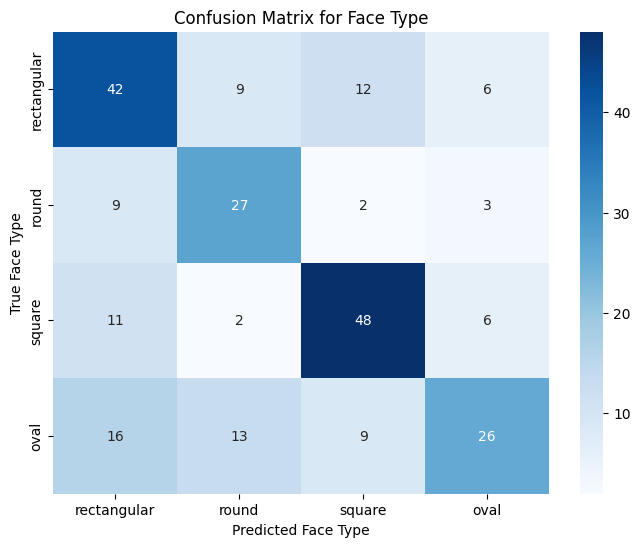

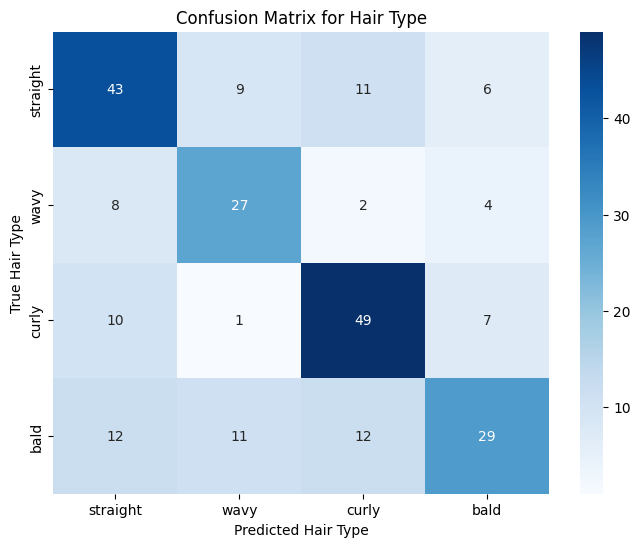

Classification Report for Face Type:
              precision    recall  f1-score   support

 rectangular       0.54      0.61      0.57        69
       round       0.53      0.66      0.59        41
      square       0.68      0.72      0.70        67
        oval       0.63      0.41      0.50        64

    accuracy                           0.59       241
   macro avg       0.59      0.60      0.59       241
weighted avg       0.60      0.59      0.59       241

Classification Report for Hair Type:
              precision    recall  f1-score   support

    straight       0.59      0.62      0.61        69
        wavy       0.56      0.66      0.61        41
       curly       0.66      0.73      0.70        67
        bald       0.63      0.45      0.53        64

    accuracy                           0.61       241
   macro avg       0.61      0.62      0.61       241
weighted avg       0.62      0.61      0.61       241



In [ ]:
# Prediksi pada data validasi
face_predictions, hair_predictions = combined_model.predict(X_val_images)

# Konversi one-hot encoding ke label asli
y_val_face_labels = np.argmax(y_val_images_encoded, axis=1)
y_val_hair_labels = np.argmax(y_val_images_encoded, axis=1)
face_pred_labels = np.argmax(face_predictions, axis=1)
hair_pred_labels = np.argmax(hair_predictions, axis=1)

# Hitung confusion matrix untuk tipe wajah
face_confusion_matrix = confusion_matrix(y_val_face_labels, face_pred_labels)
print('Confusion Matrix for Face Type:')
print(face_confusion_matrix)

# Hitung confusion matrix untuk tipe rambut
hair_confusion_matrix = confusion_matrix(y_val_hair_labels, hair_pred_labels)
print('Confusion Matrix for Hair Type:')
print(hair_confusion_matrix)

# Plot confusion matrix untuk tipe wajah
plt.figure(figsize=(8, 6))
sns.heatmap(face_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(face_class_mapping.values()), yticklabels=list(face_class_mapping.values()))
plt.xlabel('Predicted Face Type')
plt.ylabel('True Face Type')
plt.title('Confusion Matrix for Face Type')
plt.show()

# Plot confusion matrix untuk tipe rambut
plt.figure(figsize=(8, 6))
sns.heatmap(hair_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(hair_class_mapping.values()), yticklabels=list(hair_class_mapping.values()))
plt.xlabel('Predicted Hair Type')
plt.ylabel('True Hair Type')
plt.title('Confusion Matrix for Hair Type')
plt.show()

# Classification report untuk tipe wajah
print('Classification Report for Face Type:')
print(classification_report(y_val_face_labels, face_pred_labels, target_names=list(face_class_mapping.values())))

# Classification report untuk tipe rambut
print('Classification Report for Hair Type:')
print(classification_report(y_val_hair_labels, hair_pred_labels, target_names=list(hair_class_mapping.values())))

Prediction

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Model gabungan
model_path = '/content/combined_model_5.h5'

# Mendefinisikan mapping class
face_class_mapping = {0: 'rectangular', 1: 'round', 2: 'square', 3: 'oval'}
hair_class_mapping = {0: 'straight', 1: 'wavy', 2: 'curly', 3: 'bald'}

def process_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img)
    return img

# Melakukan prediksi gabungan
def predict_combined_model(image_path):
    # Load model gabungan
    combined_model = load_model(model_path)

    # Memproses gambar
    img = process_image(image_path)
    img = np.expand_dims(img, axis=0)  # Menambah dimensi batch
    img = img / 255.0  # Normalisasi

    # Prediksi dengan model gabungan
    face_predictions, hair_predictions = combined_model.predict(img)

    # Mendapatkan indeks kelas dengan probabilitas tertinggi untuk setiap output
    predicted_face_index = np.argmax(face_predictions)
    predicted_hair_index = np.argmax(hair_predictions)

    # Mengonversi indeks kelas menjadi label kelas menggunakan kamus mapping
    predicted_face_class = face_class_mapping[predicted_face_index]
    predicted_hair_class = hair_class_mapping[predicted_hair_index]

    return predicted_face_class, predicted_hair_class

image_path = '/content/train-aug/rectangular/100_aug_0.jpg'
predicted_face, predicted_hair = predict_combined_model(image_path)
print(f'Predicted face type: {predicted_face}')
print(f'Predicted hair type: {predicted_hair}')

1/1 [==============================] - 0s 190ms/step
Predicted face type: round
Predicted hair type: wavy


# Recommendation Hair Style

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

# Fungsi untuk memproses gambar
def process_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    return img

# Load gambar dan fitur dari dataset untuk model wajah
def load_face_images(dataset_folder):
    images = []
    labels = []
    for subdir in os.listdir(dataset_folder):
        subfolder_path = os.path.join(dataset_folder, subdir)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    image_path = os.path.join(subfolder_path, filename)
                    img = process_image(image_path)
                    if img is not None:
                        images.append(img)
                        labels.append(subdir)  # Misalnya label adalah nama folder
    return np.array(images), np.array(labels)

# Fungsi untuk rekomendasi hairstyle
def get_hairstyle_recommendations(hair_type, dataset_path='dataset_hairstyle', num_recommendations=3):
    hair_type_folder = os.path.join(dataset_path, hair_type)
    all_images = os.listdir(hair_type_folder)
    recommendations = random.sample(all_images, num_recommendations)
    return [os.path.join(hair_type_folder, img) for img in recommendations]

# Load dataset
train_folder = '/content/train-aug'
val_folder = '/content/train-validation-test/validation'

X_train_images, y_train_images = load_face_images(train_folder)
X_val_images, y_val_images = load_face_images(val_folder)

# Preprocessing untuk gambar
X_train_images = X_train_images / 255.0
X_val_images = X_val_images / 255.0

# Encode labels menjadi one-hot vectors
label_encoder = LabelEncoder()
y_train_images_encoded = to_categorical(label_encoder.fit_transform(y_train_images))
y_val_images_encoded = to_categorical(label_encoder.transform(y_val_images))

# Load pre-trained face model
face_model_path = '/content/face_model.h5'
face_model = load_model(face_model_path)

# Ambil output dari model wajah (sebelum softmax)
face_output = face_model.layers[-2].output  # output Dense sebelum softmax

# Buat model untuk prediksi tipe wajah
face_output_final = Dense(4, activation='softmax', name='face_output')(face_output)  # Jumlah kelas adalah 4

# Proses output dari face model untuk prediksi tipe rambut
hair_output = Dense(256, activation='relu', name='hair_dense_1')(face_output)
hair_output = Dropout(0.5, name='hair_dropout_1')(hair_output)
hair_output = Dense(128, activation='relu', name='hair_dense_2')(hair_output)
hair_output = Dropout(0.5, name='hair_dropout_2')(hair_output)
hair_output_final = Dense(4, activation='softmax', name='hair_output')(hair_output)  # Jumlah kelas adalah 4

# Buat model gabungan dengan dua output
combined_model = Model(inputs=face_model.input, outputs=[face_output_final, hair_output_final])

# Compile model
combined_model.compile(optimizer='adam',
                       loss={'face_output': 'categorical_crossentropy', 'hair_output': 'categorical_crossentropy'},
                       metrics={'face_output': 'accuracy', 'hair_output': 'accuracy'})

combined_model.summary()

# Definisikan callbacks
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    'combined_model_with_recommendations.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Latih model gabungan
history = combined_model.fit(
    X_train_images, {'face_output': y_train_images_encoded, 'hair_output': y_train_images_encoded},
    validation_data=(X_val_images, {'face_output': y_val_images_encoded, 'hair_output': y_val_images_encoded}),
    epochs=100, batch_size=32,
    callbacks=[early_stopping_callback, reduce_lr_callback, checkpoint_callback]
)

combined_model.save('combined_model_with_recommendations.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 128, 128, 32)         128       ['conv2d_3[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)           0         ['batch_normalization_3[0]

203/203 [==============================] - 19s 52ms/step - loss: 4.2260 - face_output_loss: 1.4468 - hair_output_loss: 1.4730 - face_output_accuracy: 0.2945 - hair_output_accuracy: 0.2686 - val_loss: 3.8835 - val_face_output_loss: 1.3790 - val_hair_output_loss: 1.3641 - val_face_output_accuracy: 0.3402 - val_hair_output_accuracy: 0.2614 - lr: 0.0010
Epoch 2/100
203/203 [==============================] - ETA: 0s - loss: 3.6662 - face_output_loss: 1.3343 - hair_output_loss: 1.3635 - face_output_accuracy: 0.3387 - hair_output_accuracy: 0.3128

203/203 [==============================] - 8s 40ms/step - loss: 3.6662 - face_output_loss: 1.3343 - hair_output_loss: 1.3635 - face_output_accuracy: 0.3387 - hair_output_accuracy: 0.3128 - val_loss: 3.5308 - val_face_output_loss: 1.3211 - val_hair_output_loss: 1.3140 - val_face_output_accuracy: 0.4191 - val_hair_output_accuracy: 0.4149 - lr: 0.0010
Epoch 3/100
202/203 [============================>.] - ETA: 0s - loss: 3.6668 - face_output_loss: 1.2500 - hair_output_loss: 1.2974 - face_output_accuracy: 0.4203 - hair_output_accuracy: 0.3888

203/203 [==============================] - 8s 41ms/step - loss: 3.6674 - face_output_loss: 1.2499 - hair_output_loss: 1.2967 - face_output_accuracy: 0.4206 - hair_output_accuracy: 0.3890 - val_loss: 4.0080 - val_face_output_loss: 1.2785 - val_hair_output_loss: 1.2586 - val_face_output_accuracy: 0.4398 - val_hair_output_accuracy: 0.4191 - lr: 0.0010
Epoch 4/100
203/203 [==============================] - ETA: 0s - loss: 3.7691 - face_output_loss: 1.1099 - hair_output_loss: 1.1731 - face_output_accuracy: 0.5146 - hair_output_accuracy: 0.4851

203/203 [==============================] - 8s 41ms/step - loss: 3.7691 - face_output_loss: 1.1099 - hair_output_loss: 1.1731 - face_output_accuracy: 0.5146 - hair_output_accuracy: 0.4851 - val_loss: 4.5126 - val_face_output_loss: 1.5875 - val_hair_output_loss: 1.2575 - val_face_output_accuracy: 0.4523 - val_hair_output_accuracy: 0.4772 - lr: 0.0010
Epoch 5/100
203/203 [==============================] - ETA: 0s - loss: 3.9993 - face_output_loss: 1.0437 - hair_output_loss: 1.1019 - face_output_accuracy: 0.5588 - hair_output_accuracy: 0.5289

203/203 [==============================] - 8s 40ms/step - loss: 3.9993 - face_output_loss: 1.0437 - hair_output_loss: 1.1019 - face_output_accuracy: 0.5588 - hair_output_accuracy: 0.5289 - val_loss: 4.7380 - val_face_output_loss: 1.5856 - val_hair_output_loss: 1.2153 - val_face_output_accuracy: 0.4149 - val_hair_output_accuracy: 0.4315 - lr: 0.0010
Epoch 6/100
203/203 [==============================] - ETA: 0s - loss: 3.9560 - face_output_loss: 0.9401 - hair_output_loss: 1.0014 - face_output_accuracy: 0.6118 - hair_output_accuracy: 0.5865

203/203 [==============================] - 8s 42ms/step - loss: 3.9560 - face_output_loss: 0.9401 - hair_output_loss: 1.0014 - face_output_accuracy: 0.6118 - hair_output_accuracy: 0.5865 - val_loss: 6.2066 - val_face_output_loss: 2.3688 - val_hair_output_loss: 1.6174 - val_face_output_accuracy: 0.3651 - val_hair_output_accuracy: 0.3734 - lr: 0.0010
Epoch 7/100
203/203 [==============================] - ETA: 0s - loss: 4.1842 - face_output_loss: 0.8825 - hair_output_loss: 0.9341 - face_output_accuracy: 0.6432 - hair_output_accuracy: 0.6266


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.


203/203 [==============================] - 8s 40ms/step - loss: 4.1842 - face_output_loss: 0.8825 - hair_output_loss: 0.9341 - face_output_accuracy: 0.6432 - hair_output_accuracy: 0.6266 - val_loss: 5.1663 - val_face_output_loss: 1.6016 - val_hair_output_loss: 1.3062 - val_face_output_accuracy: 0.4938 - val_hair_output_accuracy: 0.4855 - lr: 0.0010
Epoch 8/100
203/203 [==============================] - ETA: 0s - loss: 3.3630 - face_output_loss: 0.6566 - hair_output_loss: 0.7413 - face_output_accuracy: 0.7425 - hair_output_accuracy: 0.7069

203/203 [==============================] - 8s 41ms/step - loss: 3.3630 - face_output_loss: 0.6566 - hair_output_loss: 0.7413 - face_output_accuracy: 0.7425 - hair_output_accuracy: 0.7069 - val_loss: 4.2318 - val_face_output_loss: 1.3284 - val_hair_output_loss: 1.1882 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5353 - lr: 2.0000e-04
Epoch 9/100
203/203 [==============================] - ETA: 0s - loss: 2.7420 - face_output_loss: 0.5454 - hair_output_loss: 0.6253 - face_output_accuracy: 0.7929 - hair_output_accuracy: 0.7618

203/203 [==============================] - 8s 41ms/step - loss: 2.7420 - face_output_loss: 0.5454 - hair_output_loss: 0.6253 - face_output_accuracy: 0.7929 - hair_output_accuracy: 0.7618 - val_loss: 4.2903 - val_face_output_loss: 1.4448 - val_hair_output_loss: 1.3914 - val_face_output_accuracy: 0.5768 - val_hair_output_accuracy: 0.5602 - lr: 2.0000e-04
Epoch 10/100
202/203 [============================>.] - ETA: 0s - loss: 2.3522 - face_output_loss: 0.4454 - hair_output_loss: 0.5300 - face_output_accuracy: 0.8343 - hair_output_accuracy: 0.8089

203/203 [==============================] - 8s 40ms/step - loss: 2.3529 - face_output_loss: 0.4456 - hair_output_loss: 0.5306 - face_output_accuracy: 0.8340 - hair_output_accuracy: 0.8084 - val_loss: 4.0717 - val_face_output_loss: 1.3802 - val_hair_output_loss: 1.3686 - val_face_output_accuracy: 0.5311 - val_hair_output_accuracy: 0.5353 - lr: 2.0000e-04
Epoch 11/100
202/203 [============================>.] - ETA: 0s - loss: 2.0993 - face_output_loss: 0.3715 - hair_output_loss: 0.4344 - face_output_accuracy: 0.8660 - hair_output_accuracy: 0.8453

203/203 [==============================] - 8s 42ms/step - loss: 2.0981 - face_output_loss: 0.3710 - hair_output_loss: 0.4338 - face_output_accuracy: 0.8662 - hair_output_accuracy: 0.8456 - val_loss: 4.6974 - val_face_output_loss: 1.6918 - val_hair_output_loss: 1.7335 - val_face_output_accuracy: 0.5311 - val_hair_output_accuracy: 0.5394 - lr: 2.0000e-04
Epoch 12/100
202/203 [============================>.] - ETA: 0s - loss: 1.9514 - face_output_loss: 0.3224 - hair_output_loss: 0.3770 - face_output_accuracy: 0.8899 - hair_output_accuracy: 0.8648


Epoch 12: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


203/203 [==============================] - 8s 42ms/step - loss: 1.9515 - face_output_loss: 0.3223 - hair_output_loss: 0.3772 - face_output_accuracy: 0.8897 - hair_output_accuracy: 0.8648 - val_loss: 4.3183 - val_face_output_loss: 1.4813 - val_hair_output_loss: 1.5831 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5643 - lr: 2.0000e-04
Epoch 13/100
202/203 [============================>.] - ETA: 0s - loss: 1.8064 - face_output_loss: 0.2627 - hair_output_loss: 0.3187 - face_output_accuracy: 0.9182 - hair_output_accuracy: 0.8946

203/203 [==============================] - 8s 41ms/step - loss: 1.8059 - face_output_loss: 0.2625 - hair_output_loss: 0.3184 - face_output_accuracy: 0.9182 - hair_output_accuracy: 0.8947 - val_loss: 4.5539 - val_face_output_loss: 1.6144 - val_hair_output_loss: 1.7443 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 4.0000e-05
Epoch 14/100
203/203 [==============================] - ETA: 0s - loss: 1.6663 - face_output_loss: 0.2232 - hair_output_loss: 0.2747 - face_output_accuracy: 0.9340 - hair_output_accuracy: 0.9115

203/203 [==============================] - 8s 42ms/step - loss: 1.6663 - face_output_loss: 0.2232 - hair_output_loss: 0.2747 - face_output_accuracy: 0.9340 - hair_output_accuracy: 0.9115 - val_loss: 4.7835 - val_face_output_loss: 1.7318 - val_hair_output_loss: 1.9093 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 4.0000e-05
Epoch 15/100
203/203 [==============================] - ETA: 0s - loss: 1.5699 - face_output_loss: 0.1998 - hair_output_loss: 0.2515 - face_output_accuracy: 0.9390 - hair_output_accuracy: 0.9132

203/203 [==============================] - 9s 42ms/step - loss: 1.5699 - face_output_loss: 0.1998 - hair_output_loss: 0.2515 - face_output_accuracy: 0.9390 - hair_output_accuracy: 0.9132 - val_loss: 4.7789 - val_face_output_loss: 1.7464 - val_hair_output_loss: 1.9366 - val_face_output_accuracy: 0.5685 - val_hair_output_accuracy: 0.5519 - lr: 4.0000e-05
Epoch 16/100
202/203 [============================>.] - ETA: 0s - loss: 1.4806 - face_output_loss: 0.1827 - hair_output_loss: 0.2229 - face_output_accuracy: 0.9466 - hair_output_accuracy: 0.9290

203/203 [==============================] - 8s 41ms/step - loss: 1.4821 - face_output_loss: 0.1830 - hair_output_loss: 0.2242 - face_output_accuracy: 0.9465 - hair_output_accuracy: 0.9288 - val_loss: 4.7433 - val_face_output_loss: 1.7255 - val_hair_output_loss: 1.9636 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5643 - lr: 4.0000e-05
Epoch 17/100
202/203 [============================>.] - ETA: 0s - loss: 1.4400 - face_output_loss: 0.1791 - hair_output_loss: 0.2251 - face_output_accuracy: 0.9502 - hair_output_accuracy: 0.9270


Epoch 17: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.


203/203 [==============================] - 8s 42ms/step - loss: 1.4401 - face_output_loss: 0.1793 - hair_output_loss: 0.2251 - face_output_accuracy: 0.9501 - hair_output_accuracy: 0.9271 - val_loss: 4.7165 - val_face_output_loss: 1.7203 - val_hair_output_loss: 1.9790 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 4.0000e-05
Epoch 18/100
203/203 [==============================] - ETA: 0s - loss: 1.3550 - face_output_loss: 0.1501 - hair_output_loss: 0.1922 - face_output_accuracy: 0.9605 - hair_output_accuracy: 0.9347

203/203 [==============================] - 8s 41ms/step - loss: 1.3550 - face_output_loss: 0.1501 - hair_output_loss: 0.1922 - face_output_accuracy: 0.9605 - hair_output_accuracy: 0.9347 - val_loss: 4.7046 - val_face_output_loss: 1.7138 - val_hair_output_loss: 1.9825 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 8.0000e-06
Epoch 19/100
202/203 [============================>.] - ETA: 0s - loss: 1.3610 - face_output_loss: 0.1594 - hair_output_loss: 0.1976 - face_output_accuracy: 0.9602 - hair_output_accuracy: 0.9364

203/203 [==============================] - 8s 41ms/step - loss: 1.3620 - face_output_loss: 0.1599 - hair_output_loss: 0.1982 - face_output_accuracy: 0.9599 - hair_output_accuracy: 0.9362 - val_loss: 4.7163 - val_face_output_loss: 1.7203 - val_hair_output_loss: 1.9965 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 8.0000e-06
Epoch 20/100
202/203 [============================>.] - ETA: 0s - loss: 1.3616 - face_output_loss: 0.1607 - hair_output_loss: 0.2057 - face_output_accuracy: 0.9562 - hair_output_accuracy: 0.9355

203/203 [==============================] - 8s 42ms/step - loss: 1.3608 - face_output_loss: 0.1604 - hair_output_loss: 0.2051 - face_output_accuracy: 0.9564 - hair_output_accuracy: 0.9357 - val_loss: 4.7248 - val_face_output_loss: 1.7283 - val_hair_output_loss: 2.0057 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5477 - lr: 8.0000e-06
Epoch 21/100
203/203 [==============================] - ETA: 0s - loss: 1.3352 - face_output_loss: 0.1505 - hair_output_loss: 0.1982 - face_output_accuracy: 0.9604 - hair_output_accuracy: 0.9342

203/203 [==============================] - 8s 41ms/step - loss: 1.3352 - face_output_loss: 0.1505 - hair_output_loss: 0.1982 - face_output_accuracy: 0.9604 - hair_output_accuracy: 0.9342 - val_loss: 4.7358 - val_face_output_loss: 1.7357 - val_hair_output_loss: 2.0179 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 8.0000e-06
Epoch 22/100
203/203 [==============================] - ETA: 0s - loss: 1.3351 - face_output_loss: 0.1559 - hair_output_loss: 0.2012 - face_output_accuracy: 0.9581 - hair_output_accuracy: 0.9336


Epoch 22: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.


203/203 [==============================] - 8s 41ms/step - loss: 1.3351 - face_output_loss: 0.1559 - hair_output_loss: 0.2012 - face_output_accuracy: 0.9581 - hair_output_accuracy: 0.9336 - val_loss: 4.7295 - val_face_output_loss: 1.7359 - val_hair_output_loss: 2.0198 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 8.0000e-06
Epoch 23/100
203/203 [==============================] - ETA: 0s - loss: 1.2900 - face_output_loss: 0.1400 - hair_output_loss: 0.1770 - face_output_accuracy: 0.9624 - hair_output_accuracy: 0.9410

203/203 [==============================] - 8s 41ms/step - loss: 1.2900 - face_output_loss: 0.1400 - hair_output_loss: 0.1770 - face_output_accuracy: 0.9624 - hair_output_accuracy: 0.9410 - val_loss: 4.7249 - val_face_output_loss: 1.7333 - val_hair_output_loss: 2.0196 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5477 - lr: 1.6000e-06
Epoch 24/100
203/203 [==============================] - ETA: 0s - loss: 1.3188 - face_output_loss: 0.1510 - hair_output_loss: 0.1966 - face_output_accuracy: 0.9612 - hair_output_accuracy: 0.9370

203/203 [==============================] - 8s 40ms/step - loss: 1.3188 - face_output_loss: 0.1510 - hair_output_loss: 0.1966 - face_output_accuracy: 0.9612 - hair_output_accuracy: 0.9370 - val_loss: 4.7213 - val_face_output_loss: 1.7321 - val_hair_output_loss: 2.0189 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5477 - lr: 1.6000e-06
Epoch 25/100
202/203 [============================>.] - ETA: 0s - loss: 1.2948 - face_output_loss: 0.1424 - hair_output_loss: 0.1830 - face_output_accuracy: 0.9652 - hair_output_accuracy: 0.9384

203/203 [==============================] - 8s 41ms/step - loss: 1.2943 - face_output_loss: 0.1422 - hair_output_loss: 0.1827 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9387 - val_loss: 4.7297 - val_face_output_loss: 1.7374 - val_hair_output_loss: 2.0238 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5519 - lr: 1.6000e-06
Epoch 26/100
203/203 [==============================] - ETA: 0s - loss: 1.3097 - face_output_loss: 0.1485 - hair_output_loss: 0.1936 - face_output_accuracy: 0.9616 - hair_output_accuracy: 0.9371

203/203 [==============================] - 8s 41ms/step - loss: 1.3097 - face_output_loss: 0.1485 - hair_output_loss: 0.1936 - face_output_accuracy: 0.9616 - hair_output_accuracy: 0.9371 - val_loss: 4.7161 - val_face_output_loss: 1.7315 - val_hair_output_loss: 2.0179 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5519 - lr: 1.6000e-06
Epoch 27/100
203/203 [==============================] - ETA: 0s - loss: 1.2948 - face_output_loss: 0.1430 - hair_output_loss: 0.1860 - face_output_accuracy: 0.9636 - hair_output_accuracy: 0.9404


Epoch 27: ReduceLROnPlateau reducing learning rate to 1e-06.


203/203 [==============================] - 8s 41ms/step - loss: 1.2948 - face_output_loss: 0.1430 - hair_output_loss: 0.1860 - face_output_accuracy: 0.9636 - hair_output_accuracy: 0.9404 - val_loss: 4.7360 - val_face_output_loss: 1.7398 - val_hair_output_loss: 2.0313 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 1.6000e-06
Epoch 28/100
203/203 [==============================] - ETA: 0s - loss: 1.2838 - face_output_loss: 0.1420 - hair_output_loss: 0.1775 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9427

203/203 [==============================] - 8s 41ms/step - loss: 1.2838 - face_output_loss: 0.1420 - hair_output_loss: 0.1775 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9427 - val_loss: 4.7278 - val_face_output_loss: 1.7369 - val_hair_output_loss: 2.0271 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 29/100
203/203 [==============================] - ETA: 0s - loss: 1.2816 - face_output_loss: 0.1390 - hair_output_loss: 0.1794 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9445

203/203 [==============================] - 8s 42ms/step - loss: 1.2816 - face_output_loss: 0.1390 - hair_output_loss: 0.1794 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9445 - val_loss: 4.7510 - val_face_output_loss: 1.7471 - val_hair_output_loss: 2.0413 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 30/100
203/203 [==============================] - ETA: 0s - loss: 1.2671 - face_output_loss: 0.1366 - hair_output_loss: 0.1684 - face_output_accuracy: 0.9679 - hair_output_accuracy: 0.9450

203/203 [==============================] - 8s 42ms/step - loss: 1.2671 - face_output_loss: 0.1366 - hair_output_loss: 0.1684 - face_output_accuracy: 0.9679 - hair_output_accuracy: 0.9450 - val_loss: 4.7356 - val_face_output_loss: 1.7399 - val_hair_output_loss: 2.0342 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 31/100
203/203 [==============================] - ETA: 0s - loss: 1.2922 - face_output_loss: 0.1432 - hair_output_loss: 0.1881 - face_output_accuracy: 0.9630 - hair_output_accuracy: 0.9424

203/203 [==============================] - 8s 42ms/step - loss: 1.2922 - face_output_loss: 0.1432 - hair_output_loss: 0.1881 - face_output_accuracy: 0.9630 - hair_output_accuracy: 0.9424 - val_loss: 4.7418 - val_face_output_loss: 1.7427 - val_hair_output_loss: 2.0388 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 32/100
203/203 [==============================] - ETA: 0s - loss: 1.2698 - face_output_loss: 0.1376 - hair_output_loss: 0.1725 - face_output_accuracy: 0.9664 - hair_output_accuracy: 0.9448

203/203 [==============================] - 8s 42ms/step - loss: 1.2698 - face_output_loss: 0.1376 - hair_output_loss: 0.1725 - face_output_accuracy: 0.9664 - hair_output_accuracy: 0.9448 - val_loss: 4.7303 - val_face_output_loss: 1.7377 - val_hair_output_loss: 2.0334 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 33/100
203/203 [==============================] - ETA: 0s - loss: 1.2871 - face_output_loss: 0.1451 - hair_output_loss: 0.1835 - face_output_accuracy: 0.9664 - hair_output_accuracy: 0.9391

203/203 [==============================] - 8s 41ms/step - loss: 1.2871 - face_output_loss: 0.1451 - hair_output_loss: 0.1835 - face_output_accuracy: 0.9664 - hair_output_accuracy: 0.9391 - val_loss: 4.7434 - val_face_output_loss: 1.7429 - val_hair_output_loss: 2.0426 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 34/100
203/203 [==============================] - ETA: 0s - loss: 1.2678 - face_output_loss: 0.1379 - hair_output_loss: 0.1726 - face_output_accuracy: 0.9661 - hair_output_accuracy: 0.9464

203/203 [==============================] - 8s 42ms/step - loss: 1.2678 - face_output_loss: 0.1379 - hair_output_loss: 0.1726 - face_output_accuracy: 0.9661 - hair_output_accuracy: 0.9464 - val_loss: 4.7378 - val_face_output_loss: 1.7402 - val_hair_output_loss: 2.0409 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 35/100
203/203 [==============================] - ETA: 0s - loss: 1.2669 - face_output_loss: 0.1395 - hair_output_loss: 0.1713 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9484

203/203 [==============================] - 8s 42ms/step - loss: 1.2669 - face_output_loss: 0.1395 - hair_output_loss: 0.1713 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9484 - val_loss: 4.7468 - val_face_output_loss: 1.7441 - val_hair_output_loss: 2.0472 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 36/100
203/203 [==============================] - ETA: 0s - loss: 1.2914 - face_output_loss: 0.1457 - hair_output_loss: 0.1907 - face_output_accuracy: 0.9638 - hair_output_accuracy: 0.9422

203/203 [==============================] - 8s 40ms/step - loss: 1.2914 - face_output_loss: 0.1457 - hair_output_loss: 0.1907 - face_output_accuracy: 0.9638 - hair_output_accuracy: 0.9422 - val_loss: 4.7325 - val_face_output_loss: 1.7379 - val_hair_output_loss: 2.0404 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 37/100
202/203 [============================>.] - ETA: 0s - loss: 1.2816 - face_output_loss: 0.1440 - hair_output_loss: 0.1839 - face_output_accuracy: 0.9615 - hair_output_accuracy: 0.9398

203/203 [==============================] - 8s 42ms/step - loss: 1.2811 - face_output_loss: 0.1438 - hair_output_loss: 0.1836 - face_output_accuracy: 0.9616 - hair_output_accuracy: 0.9399 - val_loss: 4.7425 - val_face_output_loss: 1.7422 - val_hair_output_loss: 2.0472 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 38/100
203/203 [==============================] - ETA: 0s - loss: 1.2618 - face_output_loss: 0.1364 - hair_output_loss: 0.1730 - face_output_accuracy: 0.9655 - hair_output_accuracy: 0.9428

203/203 [==============================] - 8s 41ms/step - loss: 1.2618 - face_output_loss: 0.1364 - hair_output_loss: 0.1730 - face_output_accuracy: 0.9655 - hair_output_accuracy: 0.9428 - val_loss: 4.7179 - val_face_output_loss: 1.7324 - val_hair_output_loss: 2.0337 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 39/100
203/203 [==============================] - ETA: 0s - loss: 1.2737 - face_output_loss: 0.1399 - hair_output_loss: 0.1826 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9416

203/203 [==============================] - 8s 41ms/step - loss: 1.2737 - face_output_loss: 0.1399 - hair_output_loss: 0.1826 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9416 - val_loss: 4.7295 - val_face_output_loss: 1.7375 - val_hair_output_loss: 2.0414 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 40/100
202/203 [============================>.] - ETA: 0s - loss: 1.2695 - face_output_loss: 0.1407 - hair_output_loss: 0.1789 - face_output_accuracy: 0.9652 - hair_output_accuracy: 0.9462

203/203 [==============================] - 8s 41ms/step - loss: 1.2692 - face_output_loss: 0.1405 - hair_output_loss: 0.1787 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9462 - val_loss: 4.7480 - val_face_output_loss: 1.7461 - val_hair_output_loss: 2.0526 - val_face_output_accuracy: 0.5436 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 41/100
203/203 [==============================] - ETA: 0s - loss: 1.2553 - face_output_loss: 0.1352 - hair_output_loss: 0.1713 - face_output_accuracy: 0.9650 - hair_output_accuracy: 0.9442

203/203 [==============================] - 8s 42ms/step - loss: 1.2553 - face_output_loss: 0.1352 - hair_output_loss: 0.1713 - face_output_accuracy: 0.9650 - hair_output_accuracy: 0.9442 - val_loss: 4.7399 - val_face_output_loss: 1.7425 - val_hair_output_loss: 2.0493 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 42/100
203/203 [==============================] - ETA: 0s - loss: 1.2534 - face_output_loss: 0.1339 - hair_output_loss: 0.1721 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9444

203/203 [==============================] - 8s 41ms/step - loss: 1.2534 - face_output_loss: 0.1339 - hair_output_loss: 0.1721 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9444 - val_loss: 4.7275 - val_face_output_loss: 1.7372 - val_hair_output_loss: 2.0435 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 43/100
203/203 [==============================] - ETA: 0s - loss: 1.2577 - face_output_loss: 0.1362 - hair_output_loss: 0.1753 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9468

203/203 [==============================] - 9s 42ms/step - loss: 1.2577 - face_output_loss: 0.1362 - hair_output_loss: 0.1753 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9468 - val_loss: 4.7430 - val_face_output_loss: 1.7439 - val_hair_output_loss: 2.0534 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 44/100
202/203 [============================>.] - ETA: 0s - loss: 1.2628 - face_output_loss: 0.1373 - hair_output_loss: 0.1805 - face_output_accuracy: 0.9647 - hair_output_accuracy: 0.9392

203/203 [==============================] - 8s 42ms/step - loss: 1.2620 - face_output_loss: 0.1370 - hair_output_loss: 0.1801 - face_output_accuracy: 0.9649 - hair_output_accuracy: 0.9394 - val_loss: 4.7254 - val_face_output_loss: 1.7377 - val_hair_output_loss: 2.0433 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 45/100
203/203 [==============================] - ETA: 0s - loss: 1.2646 - face_output_loss: 0.1414 - hair_output_loss: 0.1795 - face_output_accuracy: 0.9641 - hair_output_accuracy: 0.9425

203/203 [==============================] - 9s 43ms/step - loss: 1.2646 - face_output_loss: 0.1414 - hair_output_loss: 0.1795 - face_output_accuracy: 0.9641 - hair_output_accuracy: 0.9425 - val_loss: 4.7369 - val_face_output_loss: 1.7419 - val_hair_output_loss: 2.0519 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 46/100
202/203 [============================>.] - ETA: 0s - loss: 1.2435 - face_output_loss: 0.1312 - hair_output_loss: 0.1698 - face_output_accuracy: 0.9700 - hair_output_accuracy: 0.9445

203/203 [==============================] - 8s 42ms/step - loss: 1.2433 - face_output_loss: 0.1310 - hair_output_loss: 0.1697 - face_output_accuracy: 0.9701 - hair_output_accuracy: 0.9445 - val_loss: 4.7494 - val_face_output_loss: 1.7479 - val_hair_output_loss: 2.0595 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 47/100
203/203 [==============================] - ETA: 0s - loss: 1.2595 - face_output_loss: 0.1365 - hair_output_loss: 0.1817 - face_output_accuracy: 0.9646 - hair_output_accuracy: 0.9397

203/203 [==============================] - 8s 41ms/step - loss: 1.2595 - face_output_loss: 0.1365 - hair_output_loss: 0.1817 - face_output_accuracy: 0.9646 - hair_output_accuracy: 0.9397 - val_loss: 4.7541 - val_face_output_loss: 1.7502 - val_hair_output_loss: 2.0632 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 48/100
203/203 [==============================] - ETA: 0s - loss: 1.2373 - face_output_loss: 0.1290 - hair_output_loss: 0.1682 - face_output_accuracy: 0.9701 - hair_output_accuracy: 0.9471

203/203 [==============================] - 9s 42ms/step - loss: 1.2373 - face_output_loss: 0.1290 - hair_output_loss: 0.1682 - face_output_accuracy: 0.9701 - hair_output_accuracy: 0.9471 - val_loss: 4.7523 - val_face_output_loss: 1.7495 - val_hair_output_loss: 2.0634 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 49/100
203/203 [==============================] - ETA: 0s - loss: 1.2313 - face_output_loss: 0.1287 - hair_output_loss: 0.1638 - face_output_accuracy: 0.9715 - hair_output_accuracy: 0.9481

203/203 [==============================] - 9s 42ms/step - loss: 1.2313 - face_output_loss: 0.1287 - hair_output_loss: 0.1638 - face_output_accuracy: 0.9715 - hair_output_accuracy: 0.9481 - val_loss: 4.7503 - val_face_output_loss: 1.7497 - val_hair_output_loss: 2.0624 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 50/100
203/203 [==============================] - ETA: 0s - loss: 1.2395 - face_output_loss: 0.1337 - hair_output_loss: 0.1682 - face_output_accuracy: 0.9655 - hair_output_accuracy: 0.9445

203/203 [==============================] - 8s 41ms/step - loss: 1.2395 - face_output_loss: 0.1337 - hair_output_loss: 0.1682 - face_output_accuracy: 0.9655 - hair_output_accuracy: 0.9445 - val_loss: 4.7583 - val_face_output_loss: 1.7529 - val_hair_output_loss: 2.0685 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 51/100
202/203 [============================>.] - ETA: 0s - loss: 1.2666 - face_output_loss: 0.1411 - hair_output_loss: 0.1892 - face_output_accuracy: 0.9658 - hair_output_accuracy: 0.9386

203/203 [==============================] - 8s 42ms/step - loss: 1.2666 - face_output_loss: 0.1410 - hair_output_loss: 0.1892 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9387 - val_loss: 4.7311 - val_face_output_loss: 1.7418 - val_hair_output_loss: 2.0536 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 52/100
202/203 [============================>.] - ETA: 0s - loss: 1.2421 - face_output_loss: 0.1345 - hair_output_loss: 0.1725 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9457

203/203 [==============================] - 9s 42ms/step - loss: 1.2419 - face_output_loss: 0.1343 - hair_output_loss: 0.1725 - face_output_accuracy: 0.9684 - hair_output_accuracy: 0.9459 - val_loss: 4.7456 - val_face_output_loss: 1.7476 - val_hair_output_loss: 2.0635 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 53/100
203/203 [==============================] - ETA: 0s - loss: 1.2407 - face_output_loss: 0.1354 - hair_output_loss: 0.1714 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9464

203/203 [==============================] - 8s 41ms/step - loss: 1.2407 - face_output_loss: 0.1354 - hair_output_loss: 0.1714 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9464 - val_loss: 4.7468 - val_face_output_loss: 1.7481 - val_hair_output_loss: 2.0654 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 54/100
203/203 [==============================] - ETA: 0s - loss: 1.2243 - face_output_loss: 0.1295 - hair_output_loss: 0.1622 - face_output_accuracy: 0.9696 - hair_output_accuracy: 0.9476

203/203 [==============================] - 9s 42ms/step - loss: 1.2243 - face_output_loss: 0.1295 - hair_output_loss: 0.1622 - face_output_accuracy: 0.9696 - hair_output_accuracy: 0.9476 - val_loss: 4.7604 - val_face_output_loss: 1.7545 - val_hair_output_loss: 2.0739 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 55/100
203/203 [==============================] - ETA: 0s - loss: 1.2427 - face_output_loss: 0.1365 - hair_output_loss: 0.1747 - face_output_accuracy: 0.9667 - hair_output_accuracy: 0.9417

203/203 [==============================] - 8s 42ms/step - loss: 1.2427 - face_output_loss: 0.1365 - hair_output_loss: 0.1747 - face_output_accuracy: 0.9667 - hair_output_accuracy: 0.9417 - val_loss: 4.7457 - val_face_output_loss: 1.7482 - val_hair_output_loss: 2.0667 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 56/100
203/203 [==============================] - ETA: 0s - loss: 1.2427 - face_output_loss: 0.1363 - hair_output_loss: 0.1762 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9453

203/203 [==============================] - 8s 41ms/step - loss: 1.2427 - face_output_loss: 0.1363 - hair_output_loss: 0.1762 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9453 - val_loss: 4.7383 - val_face_output_loss: 1.7447 - val_hair_output_loss: 2.0640 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 57/100
203/203 [==============================] - ETA: 0s - loss: 1.2384 - face_output_loss: 0.1342 - hair_output_loss: 0.1752 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9442

203/203 [==============================] - 8s 41ms/step - loss: 1.2384 - face_output_loss: 0.1342 - hair_output_loss: 0.1752 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9442 - val_loss: 4.7371 - val_face_output_loss: 1.7448 - val_hair_output_loss: 2.0639 - val_face_output_accuracy: 0.5477 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 58/100
203/203 [==============================] - ETA: 0s - loss: 1.2263 - face_output_loss: 0.1322 - hair_output_loss: 0.1663 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9461

203/203 [==============================] - 8s 42ms/step - loss: 1.2263 - face_output_loss: 0.1322 - hair_output_loss: 0.1663 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9461 - val_loss: 4.7527 - val_face_output_loss: 1.7516 - val_hair_output_loss: 2.0738 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 59/100
203/203 [==============================] - ETA: 0s - loss: 1.2332 - face_output_loss: 0.1331 - hair_output_loss: 0.1734 - face_output_accuracy: 0.9649 - hair_output_accuracy: 0.9416

203/203 [==============================] - 8s 42ms/step - loss: 1.2332 - face_output_loss: 0.1331 - hair_output_loss: 0.1734 - face_output_accuracy: 0.9649 - hair_output_accuracy: 0.9416 - val_loss: 4.7637 - val_face_output_loss: 1.7567 - val_hair_output_loss: 2.0810 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 60/100
202/203 [============================>.] - ETA: 0s - loss: 1.2428 - face_output_loss: 0.1385 - hair_output_loss: 0.1788 - face_output_accuracy: 0.9670 - hair_output_accuracy: 0.9423

203/203 [==============================] - 8s 42ms/step - loss: 1.2429 - face_output_loss: 0.1386 - hair_output_loss: 0.1789 - face_output_accuracy: 0.9672 - hair_output_accuracy: 0.9424 - val_loss: 4.7544 - val_face_output_loss: 1.7530 - val_hair_output_loss: 2.0766 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 61/100
203/203 [==============================] - ETA: 0s - loss: 1.2204 - face_output_loss: 0.1295 - hair_output_loss: 0.1667 - face_output_accuracy: 0.9675 - hair_output_accuracy: 0.9456

203/203 [==============================] - 8s 42ms/step - loss: 1.2204 - face_output_loss: 0.1295 - hair_output_loss: 0.1667 - face_output_accuracy: 0.9675 - hair_output_accuracy: 0.9456 - val_loss: 4.7439 - val_face_output_loss: 1.7485 - val_hair_output_loss: 2.0717 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 62/100
203/203 [==============================] - ETA: 0s - loss: 1.2274 - face_output_loss: 0.1305 - hair_output_loss: 0.1738 - face_output_accuracy: 0.9669 - hair_output_accuracy: 0.9444

203/203 [==============================] - 8s 41ms/step - loss: 1.2274 - face_output_loss: 0.1305 - hair_output_loss: 0.1738 - face_output_accuracy: 0.9669 - hair_output_accuracy: 0.9444 - val_loss: 4.7598 - val_face_output_loss: 1.7557 - val_hair_output_loss: 2.0816 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 63/100
202/203 [============================>.] - ETA: 0s - loss: 1.2214 - face_output_loss: 0.1315 - hair_output_loss: 0.1679 - face_output_accuracy: 0.9663 - hair_output_accuracy: 0.9459

203/203 [==============================] - 8s 42ms/step - loss: 1.2208 - face_output_loss: 0.1313 - hair_output_loss: 0.1675 - face_output_accuracy: 0.9664 - hair_output_accuracy: 0.9461 - val_loss: 4.7619 - val_face_output_loss: 1.7571 - val_hair_output_loss: 2.0834 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 64/100
203/203 [==============================] - ETA: 0s - loss: 1.2339 - face_output_loss: 0.1334 - hair_output_loss: 0.1797 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9468

203/203 [==============================] - 8s 41ms/step - loss: 1.2339 - face_output_loss: 0.1334 - hair_output_loss: 0.1797 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9468 - val_loss: 4.7608 - val_face_output_loss: 1.7576 - val_hair_output_loss: 2.0830 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 65/100
203/203 [==============================] - ETA: 0s - loss: 1.2231 - face_output_loss: 0.1307 - hair_output_loss: 0.1727 - face_output_accuracy: 0.9673 - hair_output_accuracy: 0.9442

203/203 [==============================] - 8s 41ms/step - loss: 1.2231 - face_output_loss: 0.1307 - hair_output_loss: 0.1727 - face_output_accuracy: 0.9673 - hair_output_accuracy: 0.9442 - val_loss: 4.7423 - val_face_output_loss: 1.7495 - val_hair_output_loss: 2.0737 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 66/100
202/203 [============================>.] - ETA: 0s - loss: 1.2213 - face_output_loss: 0.1318 - hair_output_loss: 0.1709 - face_output_accuracy: 0.9653 - hair_output_accuracy: 0.9457

203/203 [==============================] - 8s 42ms/step - loss: 1.2214 - face_output_loss: 0.1318 - hair_output_loss: 0.1710 - face_output_accuracy: 0.9652 - hair_output_accuracy: 0.9456 - val_loss: 4.7636 - val_face_output_loss: 1.7588 - val_hair_output_loss: 2.0869 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 67/100
203/203 [==============================] - ETA: 0s - loss: 1.2305 - face_output_loss: 0.1375 - hair_output_loss: 0.1756 - face_output_accuracy: 0.9622 - hair_output_accuracy: 0.9434

203/203 [==============================] - 8s 41ms/step - loss: 1.2305 - face_output_loss: 0.1375 - hair_output_loss: 0.1756 - face_output_accuracy: 0.9622 - hair_output_accuracy: 0.9434 - val_loss: 4.7614 - val_face_output_loss: 1.7583 - val_hair_output_loss: 2.0861 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 68/100
203/203 [==============================] - ETA: 0s - loss: 1.2187 - face_output_loss: 0.1313 - hair_output_loss: 0.1711 - face_output_accuracy: 0.9670 - hair_output_accuracy: 0.9447

203/203 [==============================] - 8s 42ms/step - loss: 1.2187 - face_output_loss: 0.1313 - hair_output_loss: 0.1711 - face_output_accuracy: 0.9670 - hair_output_accuracy: 0.9447 - val_loss: 4.7647 - val_face_output_loss: 1.7594 - val_hair_output_loss: 2.0895 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 69/100
203/203 [==============================] - ETA: 0s - loss: 1.2138 - face_output_loss: 0.1310 - hair_output_loss: 0.1676 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9448

203/203 [==============================] - 9s 42ms/step - loss: 1.2138 - face_output_loss: 0.1310 - hair_output_loss: 0.1676 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9448 - val_loss: 4.7527 - val_face_output_loss: 1.7551 - val_hair_output_loss: 2.0829 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 70/100
203/203 [==============================] - ETA: 0s - loss: 1.2321 - face_output_loss: 0.1361 - hair_output_loss: 0.1819 - face_output_accuracy: 0.9647 - hair_output_accuracy: 0.9430

203/203 [==============================] - 8s 41ms/step - loss: 1.2321 - face_output_loss: 0.1361 - hair_output_loss: 0.1819 - face_output_accuracy: 0.9647 - hair_output_accuracy: 0.9430 - val_loss: 4.7459 - val_face_output_loss: 1.7513 - val_hair_output_loss: 2.0810 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 71/100
202/203 [============================>.] - ETA: 0s - loss: 1.1830 - face_output_loss: 0.1200 - hair_output_loss: 0.1499 - face_output_accuracy: 0.9732 - hair_output_accuracy: 0.9483

203/203 [==============================] - 8s 41ms/step - loss: 1.1828 - face_output_loss: 0.1200 - hair_output_loss: 0.1498 - face_output_accuracy: 0.9733 - hair_output_accuracy: 0.9484 - val_loss: 4.7788 - val_face_output_loss: 1.7668 - val_hair_output_loss: 2.0995 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5643 - lr: 1.0000e-06
Epoch 72/100
203/203 [==============================] - ETA: 0s - loss: 1.2138 - face_output_loss: 0.1315 - hair_output_loss: 0.1703 - face_output_accuracy: 0.9658 - hair_output_accuracy: 0.9459

203/203 [==============================] - 8s 42ms/step - loss: 1.2138 - face_output_loss: 0.1315 - hair_output_loss: 0.1703 - face_output_accuracy: 0.9658 - hair_output_accuracy: 0.9459 - val_loss: 4.7690 - val_face_output_loss: 1.7622 - val_hair_output_loss: 2.0954 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 73/100
203/203 [==============================] - ETA: 0s - loss: 1.1995 - face_output_loss: 0.1272 - hair_output_loss: 0.1614 - face_output_accuracy: 0.9706 - hair_output_accuracy: 0.9502

203/203 [==============================] - 8s 41ms/step - loss: 1.1995 - face_output_loss: 0.1272 - hair_output_loss: 0.1614 - face_output_accuracy: 0.9706 - hair_output_accuracy: 0.9502 - val_loss: 4.7814 - val_face_output_loss: 1.7667 - val_hair_output_loss: 2.1044 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 74/100
203/203 [==============================] - ETA: 0s - loss: 1.2054 - face_output_loss: 0.1302 - hair_output_loss: 0.1654 - face_output_accuracy: 0.9693 - hair_output_accuracy: 0.9474

203/203 [==============================] - 9s 43ms/step - loss: 1.2054 - face_output_loss: 0.1302 - hair_output_loss: 0.1654 - face_output_accuracy: 0.9693 - hair_output_accuracy: 0.9474 - val_loss: 4.7725 - val_face_output_loss: 1.7634 - val_hair_output_loss: 2.0999 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 75/100
203/203 [==============================] - ETA: 0s - loss: 1.2011 - face_output_loss: 0.1266 - hair_output_loss: 0.1657 - face_output_accuracy: 0.9692 - hair_output_accuracy: 0.9478

203/203 [==============================] - 8s 41ms/step - loss: 1.2011 - face_output_loss: 0.1266 - hair_output_loss: 0.1657 - face_output_accuracy: 0.9692 - hair_output_accuracy: 0.9478 - val_loss: 4.7610 - val_face_output_loss: 1.7590 - val_hair_output_loss: 2.0938 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5643 - lr: 1.0000e-06
Epoch 76/100
202/203 [============================>.] - ETA: 0s - loss: 1.2001 - face_output_loss: 0.1268 - hair_output_loss: 0.1657 - face_output_accuracy: 0.9681 - hair_output_accuracy: 0.9462

203/203 [==============================] - 8s 41ms/step - loss: 1.2004 - face_output_loss: 0.1268 - hair_output_loss: 0.1659 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9459 - val_loss: 4.7605 - val_face_output_loss: 1.7600 - val_hair_output_loss: 2.0933 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 77/100
202/203 [============================>.] - ETA: 0s - loss: 1.2005 - face_output_loss: 0.1281 - hair_output_loss: 0.1658 - face_output_accuracy: 0.9711 - hair_output_accuracy: 0.9472

203/203 [==============================] - 8s 42ms/step - loss: 1.2001 - face_output_loss: 0.1280 - hair_output_loss: 0.1655 - face_output_accuracy: 0.9710 - hair_output_accuracy: 0.9474 - val_loss: 4.7807 - val_face_output_loss: 1.7677 - val_hair_output_loss: 2.1069 - val_face_output_accuracy: 0.5519 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 78/100
202/203 [============================>.] - ETA: 0s - loss: 1.1901 - face_output_loss: 0.1272 - hair_output_loss: 0.1574 - face_output_accuracy: 0.9694 - hair_output_accuracy: 0.9503

203/203 [==============================] - 8s 41ms/step - loss: 1.1900 - face_output_loss: 0.1271 - hair_output_loss: 0.1574 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9505 - val_loss: 4.7801 - val_face_output_loss: 1.7675 - val_hair_output_loss: 2.1077 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 79/100
202/203 [============================>.] - ETA: 0s - loss: 1.2049 - face_output_loss: 0.1311 - hair_output_loss: 0.1694 - face_output_accuracy: 0.9677 - hair_output_accuracy: 0.9445

203/203 [==============================] - 8s 41ms/step - loss: 1.2046 - face_output_loss: 0.1311 - hair_output_loss: 0.1691 - face_output_accuracy: 0.9678 - hair_output_accuracy: 0.9447 - val_loss: 4.7748 - val_face_output_loss: 1.7652 - val_hair_output_loss: 2.1057 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 80/100
202/203 [============================>.] - ETA: 0s - loss: 1.1909 - face_output_loss: 0.1278 - hair_output_loss: 0.1597 - face_output_accuracy: 0.9686 - hair_output_accuracy: 0.9451

203/203 [==============================] - 8s 42ms/step - loss: 1.1915 - face_output_loss: 0.1283 - hair_output_loss: 0.1598 - face_output_accuracy: 0.9684 - hair_output_accuracy: 0.9450 - val_loss: 4.7766 - val_face_output_loss: 1.7664 - val_hair_output_loss: 2.1073 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 81/100
203/203 [==============================] - ETA: 0s - loss: 1.2025 - face_output_loss: 0.1263 - hair_output_loss: 0.1739 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9458

203/203 [==============================] - 8s 41ms/step - loss: 1.2025 - face_output_loss: 0.1263 - hair_output_loss: 0.1739 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9458 - val_loss: 4.7783 - val_face_output_loss: 1.7682 - val_hair_output_loss: 2.1083 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 82/100
202/203 [============================>.] - ETA: 0s - loss: 1.1969 - face_output_loss: 0.1280 - hair_output_loss: 0.1676 - face_output_accuracy: 0.9691 - hair_output_accuracy: 0.9443

203/203 [==============================] - 8s 41ms/step - loss: 1.1971 - face_output_loss: 0.1281 - hair_output_loss: 0.1677 - face_output_accuracy: 0.9690 - hair_output_accuracy: 0.9442 - val_loss: 4.7757 - val_face_output_loss: 1.7669 - val_hair_output_loss: 2.1080 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 83/100
202/203 [============================>.] - ETA: 0s - loss: 1.2027 - face_output_loss: 0.1305 - hair_output_loss: 0.1719 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9485

203/203 [==============================] - 8s 42ms/step - loss: 1.2030 - face_output_loss: 0.1307 - hair_output_loss: 0.1720 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9484 - val_loss: 4.7794 - val_face_output_loss: 1.7680 - val_hair_output_loss: 2.1117 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 84/100
203/203 [==============================] - ETA: 0s - loss: 1.1943 - face_output_loss: 0.1279 - hair_output_loss: 0.1671 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9456

203/203 [==============================] - 8s 41ms/step - loss: 1.1943 - face_output_loss: 0.1279 - hair_output_loss: 0.1671 - face_output_accuracy: 0.9683 - hair_output_accuracy: 0.9456 - val_loss: 4.7770 - val_face_output_loss: 1.7669 - val_hair_output_loss: 2.1113 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 85/100
203/203 [==============================] - ETA: 0s - loss: 1.1914 - face_output_loss: 0.1264 - hair_output_loss: 0.1668 - face_output_accuracy: 0.9716 - hair_output_accuracy: 0.9478

203/203 [==============================] - 8s 41ms/step - loss: 1.1914 - face_output_loss: 0.1264 - hair_output_loss: 0.1668 - face_output_accuracy: 0.9716 - hair_output_accuracy: 0.9478 - val_loss: 4.7950 - val_face_output_loss: 1.7760 - val_hair_output_loss: 2.1213 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5643 - lr: 1.0000e-06
Epoch 86/100
202/203 [============================>.] - ETA: 0s - loss: 1.1770 - face_output_loss: 0.1201 - hair_output_loss: 0.1598 - face_output_accuracy: 0.9712 - hair_output_accuracy: 0.9488

203/203 [==============================] - 8s 42ms/step - loss: 1.1773 - face_output_loss: 0.1201 - hair_output_loss: 0.1600 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9485 - val_loss: 4.7743 - val_face_output_loss: 1.7678 - val_hair_output_loss: 2.1098 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 87/100
203/203 [==============================] - ETA: 0s - loss: 1.1817 - face_output_loss: 0.1234 - hair_output_loss: 0.1621 - face_output_accuracy: 0.9693 - hair_output_accuracy: 0.9504

203/203 [==============================] - 8s 41ms/step - loss: 1.1817 - face_output_loss: 0.1234 - hair_output_loss: 0.1621 - face_output_accuracy: 0.9693 - hair_output_accuracy: 0.9504 - val_loss: 4.7911 - val_face_output_loss: 1.7754 - val_hair_output_loss: 2.1201 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 88/100
203/203 [==============================] - ETA: 0s - loss: 1.1846 - face_output_loss: 0.1263 - hair_output_loss: 0.1631 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9471

203/203 [==============================] - 9s 43ms/step - loss: 1.1846 - face_output_loss: 0.1263 - hair_output_loss: 0.1631 - face_output_accuracy: 0.9695 - hair_output_accuracy: 0.9471 - val_loss: 4.7986 - val_face_output_loss: 1.7787 - val_hair_output_loss: 2.1253 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5643 - lr: 1.0000e-06
Epoch 89/100
203/203 [==============================] - ETA: 0s - loss: 1.1841 - face_output_loss: 0.1238 - hair_output_loss: 0.1661 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9479

203/203 [==============================] - 8s 42ms/step - loss: 1.1841 - face_output_loss: 0.1238 - hair_output_loss: 0.1661 - face_output_accuracy: 0.9713 - hair_output_accuracy: 0.9479 - val_loss: 4.8012 - val_face_output_loss: 1.7799 - val_hair_output_loss: 2.1277 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 90/100
203/203 [==============================] - ETA: 0s - loss: 1.1834 - face_output_loss: 0.1262 - hair_output_loss: 0.1641 - face_output_accuracy: 0.9684 - hair_output_accuracy: 0.9487

203/203 [==============================] - 8s 41ms/step - loss: 1.1834 - face_output_loss: 0.1262 - hair_output_loss: 0.1641 - face_output_accuracy: 0.9684 - hair_output_accuracy: 0.9487 - val_loss: 4.7992 - val_face_output_loss: 1.7801 - val_hair_output_loss: 2.1265 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 91/100
202/203 [============================>.] - ETA: 0s - loss: 1.1704 - face_output_loss: 0.1205 - hair_output_loss: 0.1578 - face_output_accuracy: 0.9720 - hair_output_accuracy: 0.9500

203/203 [==============================] - 9s 42ms/step - loss: 1.1706 - face_output_loss: 0.1206 - hair_output_loss: 0.1579 - face_output_accuracy: 0.9720 - hair_output_accuracy: 0.9499 - val_loss: 4.7983 - val_face_output_loss: 1.7796 - val_hair_output_loss: 2.1271 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 92/100
202/203 [============================>.] - ETA: 0s - loss: 1.1868 - face_output_loss: 0.1280 - hair_output_loss: 0.1677 - face_output_accuracy: 0.9709 - hair_output_accuracy: 0.9460

203/203 [==============================] - 8s 42ms/step - loss: 1.1866 - face_output_loss: 0.1279 - hair_output_loss: 0.1675 - face_output_accuracy: 0.9709 - hair_output_accuracy: 0.9461 - val_loss: 4.7884 - val_face_output_loss: 1.7755 - val_hair_output_loss: 2.1222 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 93/100
203/203 [==============================] - ETA: 0s - loss: 1.1688 - face_output_loss: 0.1202 - hair_output_loss: 0.1584 - face_output_accuracy: 0.9733 - hair_output_accuracy: 0.9524

203/203 [==============================] - 8s 41ms/step - loss: 1.1688 - face_output_loss: 0.1202 - hair_output_loss: 0.1584 - face_output_accuracy: 0.9733 - hair_output_accuracy: 0.9524 - val_loss: 4.8053 - val_face_output_loss: 1.7832 - val_hair_output_loss: 2.1324 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5643 - lr: 1.0000e-06
Epoch 94/100
203/203 [==============================] - ETA: 0s - loss: 1.1697 - face_output_loss: 0.1244 - hair_output_loss: 0.1561 - face_output_accuracy: 0.9703 - hair_output_accuracy: 0.9495

203/203 [==============================] - 9s 42ms/step - loss: 1.1697 - face_output_loss: 0.1244 - hair_output_loss: 0.1561 - face_output_accuracy: 0.9703 - hair_output_accuracy: 0.9495 - val_loss: 4.7913 - val_face_output_loss: 1.7768 - val_hair_output_loss: 2.1258 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 95/100
202/203 [============================>.] - ETA: 0s - loss: 1.1827 - face_output_loss: 0.1248 - hair_output_loss: 0.1698 - face_output_accuracy: 0.9675 - hair_output_accuracy: 0.9454

203/203 [==============================] - 8s 42ms/step - loss: 1.1827 - face_output_loss: 0.1247 - hair_output_loss: 0.1698 - face_output_accuracy: 0.9676 - hair_output_accuracy: 0.9454 - val_loss: 4.7940 - val_face_output_loss: 1.7789 - val_hair_output_loss: 2.1274 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5519 - lr: 1.0000e-06
Epoch 96/100
203/203 [==============================] - ETA: 0s - loss: 1.1826 - face_output_loss: 0.1286 - hair_output_loss: 0.1669 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9468

203/203 [==============================] - 8s 41ms/step - loss: 1.1826 - face_output_loss: 0.1286 - hair_output_loss: 0.1669 - face_output_accuracy: 0.9659 - hair_output_accuracy: 0.9468 - val_loss: 4.7959 - val_face_output_loss: 1.7795 - val_hair_output_loss: 2.1298 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 97/100
202/203 [============================>.] - ETA: 0s - loss: 1.1672 - face_output_loss: 0.1220 - hair_output_loss: 0.1591 - face_output_accuracy: 0.9711 - hair_output_accuracy: 0.9511

203/203 [==============================] - 8s 42ms/step - loss: 1.1683 - face_output_loss: 0.1224 - hair_output_loss: 0.1598 - face_output_accuracy: 0.9709 - hair_output_accuracy: 0.9510 - val_loss: 4.7928 - val_face_output_loss: 1.7789 - val_hair_output_loss: 2.1283 - val_face_output_accuracy: 0.5560 - val_hair_output_accuracy: 0.5602 - lr: 1.0000e-06
Epoch 98/100
203/203 [==============================] - ETA: 0s - loss: 1.1689 - face_output_loss: 0.1205 - hair_output_loss: 0.1633 - face_output_accuracy: 0.9736 - hair_output_accuracy: 0.9481

203/203 [==============================] - 8s 42ms/step - loss: 1.1689 - face_output_loss: 0.1205 - hair_output_loss: 0.1633 - face_output_accuracy: 0.9736 - hair_output_accuracy: 0.9481 - val_loss: 4.7885 - val_face_output_loss: 1.7771 - val_hair_output_loss: 2.1267 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5477 - lr: 1.0000e-06
Epoch 99/100
202/203 [============================>.] - ETA: 0s - loss: 1.1780 - face_output_loss: 0.1240 - hair_output_loss: 0.1698 - face_output_accuracy: 0.9686 - hair_output_accuracy: 0.9466

203/203 [==============================] - 8s 41ms/step - loss: 1.1778 - face_output_loss: 0.1240 - hair_output_loss: 0.1696 - face_output_accuracy: 0.9686 - hair_output_accuracy: 0.9467 - val_loss: 4.7892 - val_face_output_loss: 1.7775 - val_hair_output_loss: 2.1280 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06
Epoch 100/100
203/203 [==============================] - ETA: 0s - loss: 1.1616 - face_output_loss: 0.1205 - hair_output_loss: 0.1579 - face_output_accuracy: 0.9712 - hair_output_accuracy: 0.9544

203/203 [==============================] - 9s 42ms/step - loss: 1.1616 - face_output_loss: 0.1205 - hair_output_loss: 0.1579 - face_output_accuracy: 0.9712 - hair_output_accuracy: 0.9544 - val_loss: 4.7853 - val_face_output_loss: 1.7751 - val_hair_output_loss: 2.1274 - val_face_output_accuracy: 0.5602 - val_hair_output_accuracy: 0.5560 - lr: 1.0000e-06


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction

1/1 [==============================] - 0s 109ms/step
Predicted Face Type: rectangular
Predicted Hair Type: curly hair
Recommendations:


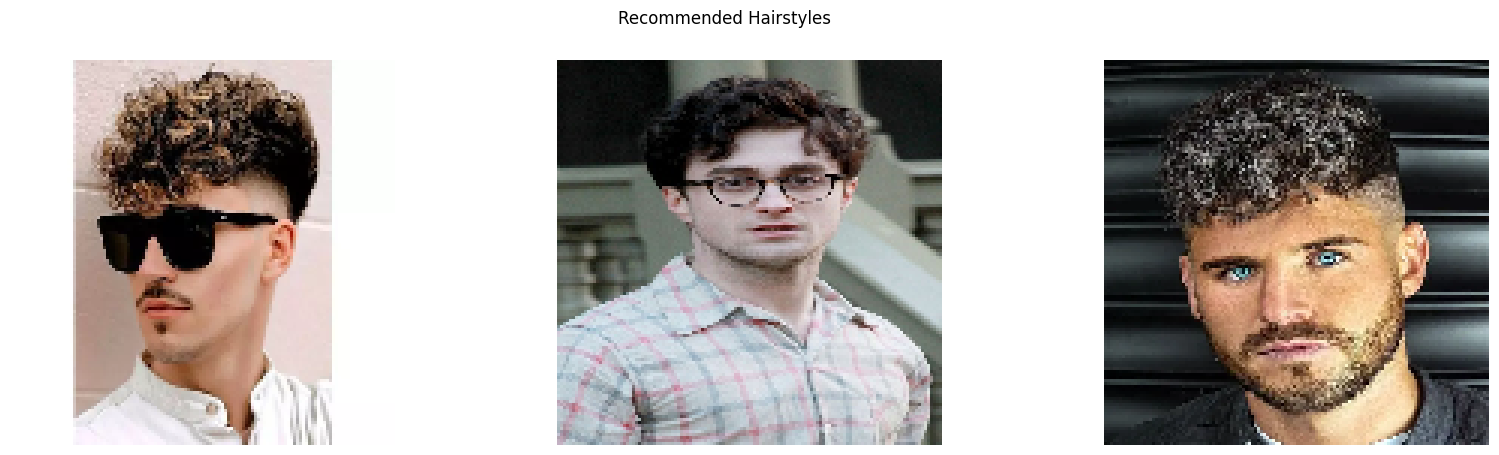

In [ ]:
# Hair type classes
hair_type_classes = ['straight hair', 'curly hair', 'wavy hair', 'bald hair']
face_type_classes = ['ovale', 'rectangular', 'square', 'round']  # Sesuaikan dengan kelas yang ada

# Wrapper function for prediction and hairstyle recommendation
def predict_and_recommend(image_path, model, dataset_path='/content/temp_dataset_rambut/tipe_rambut'):
    # Preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Perform prediction
    face_pred, hair_pred = model.predict(img_array)

    # Decode predictions
    face_type = np.argmax(face_pred[0])
    hair_type = np.argmax(hair_pred[0])
    predicted_face_type = face_type_classes[face_type]
    predicted_hair_type = hair_type_classes[hair_type]

    # Get hairstyle recommendations
    recommendations = get_hairstyle_recommendations(predicted_hair_type, dataset_path)

    return predicted_face_type, predicted_hair_type, recommendations

# Function to display images
def display_images(image_paths, title='Image'):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, img_path in zip(axes, image_paths):
        img = image.load_img(img_path, target_size=(128, 128))
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Example usage
if __name__ == '__main__':
    image_path = '/content/542.jpg'
    predicted_face_type, predicted_hair_type, recommendations = predict_and_recommend(image_path, combined_model)

    print(f"Predicted Face Type: {predicted_face_type}")
    print(f"Predicted Hair Type: {predicted_hair_type}")
    print("Recommendations:")

    display_images(recommendations, title='Recommended Hairstyles')